# Análisis de tasa de cancelación de clientes en banco ABC

## Introducción

En este proyecto se llevará a cabo un análisis de datos relacionados con clientes que han cancelado su servicio en el banco multinacional ABC. El objetivo principal es identificar *insights* relevantes a partir del conjunto de datos que permitan predecir de manera efectiva la deserción de clientes. Además, utilizando estos datos se desarrollarán modelos de Machine Learning y Deep Learning que permitarán detectar potenciales deserciones de clientes de manera oportuna, para así implementar estrategias de retención.

El conjunto de datos que será utilizado fue obtenido del repositorio Kaggle y se encuentra disponible en el siguiente enlace: [Bank Customer Churn Dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data)

----

## Carga y descripción del conjunto de datos

Para realizar el análisis de datos, importamos algunas de las librerías que se requeriran.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#matplotlib inline

Importamos el conjunto de datos e imprimimos las primeras instancias.

In [77]:
df_raw = pd.read_csv('C:/Users/Adrej/OneDrive/Escritorio/Proyectos/BankCustomerChurnPrediction/BankCustomerChurnPrediction.csv')
df_raw.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

Como en la mayoría de los conjuntos de datos, este dataset está compuesto por variables numéricas y categóricas. A continuación, se describen brevemente dichas variables:

**Variables numéricas:**
- `credit_score`: Puntaje crediticio basado en el análisis del historial financiero del cliente. Representa su solvencia, y usualmente varía en un rango de 300 a 850.
- `age`: Edad del cliente.
- `tenure`: Años de antigüedad del cliente como usuario del banco.
- `balance`: Saldo actual en la cuenta del cliente.
- `products_number`: Número de productos o servicios financieros contratados (por ejemplo, tarjeta de crédito, débito, préstamos, etc.).
- `estimated_salary`: Ingreso estimado del cliente, ya sea reportado o inferido, generalmente expresado en términos anuales.

**Variables categóricas**:
- `country`: País de residencia del cliente.
- `gender`: Género del cliente.
- `credit_card`: Variable binaria que indica si el cliente posee una tarjeta de crédito emitida por el banco ABC.
- `active_member`: Variable binaria que señala si el cliente ha estado activo recientemente (por ejemplo, mediante transacciones u operaciones bancarias).

**Variable objetivo**:
- `churn`: Variable binaria que indica si el cliente ha cancelado su servicio con el banco (0: No, 1: Sí).

Adicionalmente, el conjunto de datos contiene la variable `customer_id`, que corresponde únicamente al identificador único del cliente. Dado que no aporta información útil para el análisis predictivo, se excluirá del conjunto de características en la etapa del preprocesamiento.

A continuación, se presentan los tipos de datos de cada una de las variables del conjunto.

In [78]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Se observa que el conjunto de datos contiene 10,000 instancias y que no presenta valores nulos en ninguna de sus variables. A continuación, se muestran las distribuciones generales de las variables, así como un resumen estadístico de sus características numéricas.

In [79]:
df_raw.describe(include = 'all')

customer_id  credit_score country gender           age        tenure  \
count   1.000000e+04  10000.000000   10000  10000  10000.000000  10000.000000   
unique           NaN           NaN       3      2           NaN           NaN   
top              NaN           NaN  France   Male           NaN           NaN   
freq             NaN           NaN    5014   5457           NaN           NaN   
mean    1.569094e+07    650.528800     NaN    NaN     38.921800      5.012800   
std     7.193619e+04     96.653299     NaN    NaN     10.487806      2.892174   
min     1.556570e+07    350.000000     NaN    NaN     18.000000      0.000000   
25%     1.562853e+07    584.000000     NaN    NaN     32.000000      3.000000   
50%     1.569074e+07    652.000000     NaN    NaN     37.000000      5.000000   
75%     1.575323e+07    718.000000     NaN    NaN     44.000000      7.000000   
max     1.581569e+07    850.000000     NaN    NaN     92.000000     10.000000   

              balance  products_number  credit_card  active_member  \
count    10000.000000     10000.000000  10000.00000   10000.000000   
unique            NaN              NaN          NaN            NaN   
top               NaN              NaN          NaN            NaN   
freq              NaN              NaN          NaN            NaN   
mean     76485.889288         1.530200      0.70550       0.515100   
std      62397.405202         0.581654      0.45584       0.499797   
min          0.000000         1.000000      0.00000       0.000000   
25%          0.000000         1.000000      0.00000       0.000000   
50%      97198.540000         1.000000      1.00000       1.000000   
75%     127644.240000         2.000000      1.00000       1.000000   
max     250898.090000         4.000000      1.00000       1.000000   

        estimated_salary         churn  
count       10000.000000  10000.000000  
unique               NaN           NaN  
top                  NaN           NaN  
freq                 NaN           NaN  
mean       100090.239881      0.203700  
std         57510.492818      0.402769  
min            11.580000      0.000000  
25%         51002.110000      0.000000  
50%        100193.915000      0.000000  
75%        149388.247500      0.000000  
max        199992.480000      1.000000

Observamos que la variable de países (`contry`) contiene sólo 3 valores distintos, los cuales son:

In [80]:
df_raw['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Por último, revisaremos la variable objetivo `churn` lo cual nos permitirá conocer la distribución de las instancias del conjunto de datos.

In [81]:
df_raw['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

Como se puede observar, la variable objetivo presenta un desequilibrio en la distribución de clases, por lo cual es importante tener precaución al momento de entrenar modelos, ya que podrían inclinarse a favorecer la clase mayoritaria, lo que resultaría en un sobreajuste y un rendimiento deficiente en la detección de la clase minoritaria.

----

## Preprocesamiento de datos

Dado que el conjunto de datos no cuenta con valores nulos, que no es necesario realizar un proceso de limpieza en el preprocesamiento. Como se mencionó, es necesario eliminar la columna `customer_id` dado que no aporta información relevante. Además, se observó que la variable `gender` está codificada como una cadena de texto (`string`). Para facilitar el uso de esta variable se convertirá a variable numérica. Para ello, se asignarán los siguientes valores:
* `Male`: 0
* `Female`: 1

In [82]:
df_raw = df_raw.drop(columns = ['customer_id'])

In [83]:
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female': 1})

----

## Análisis exploratorio de datos

Se analizarán las distribuciones de las variables para cada una de las dos clases de la variable objetivo: clientes que han abandonado el servicio y clientes que mantenienen. Este análisis permitirá identificar diferencias en los patrones de comportamiento entre ambos grupos, lo cual es útil para la detección de *insights* y así construir modelos predictivos más precisos.

### Análisis de variables continuas

In [84]:
numerical_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

#### Gráfico de violín

Inicialmente, se realizará un análisis de distribuciones para las distintas variables numéricas.

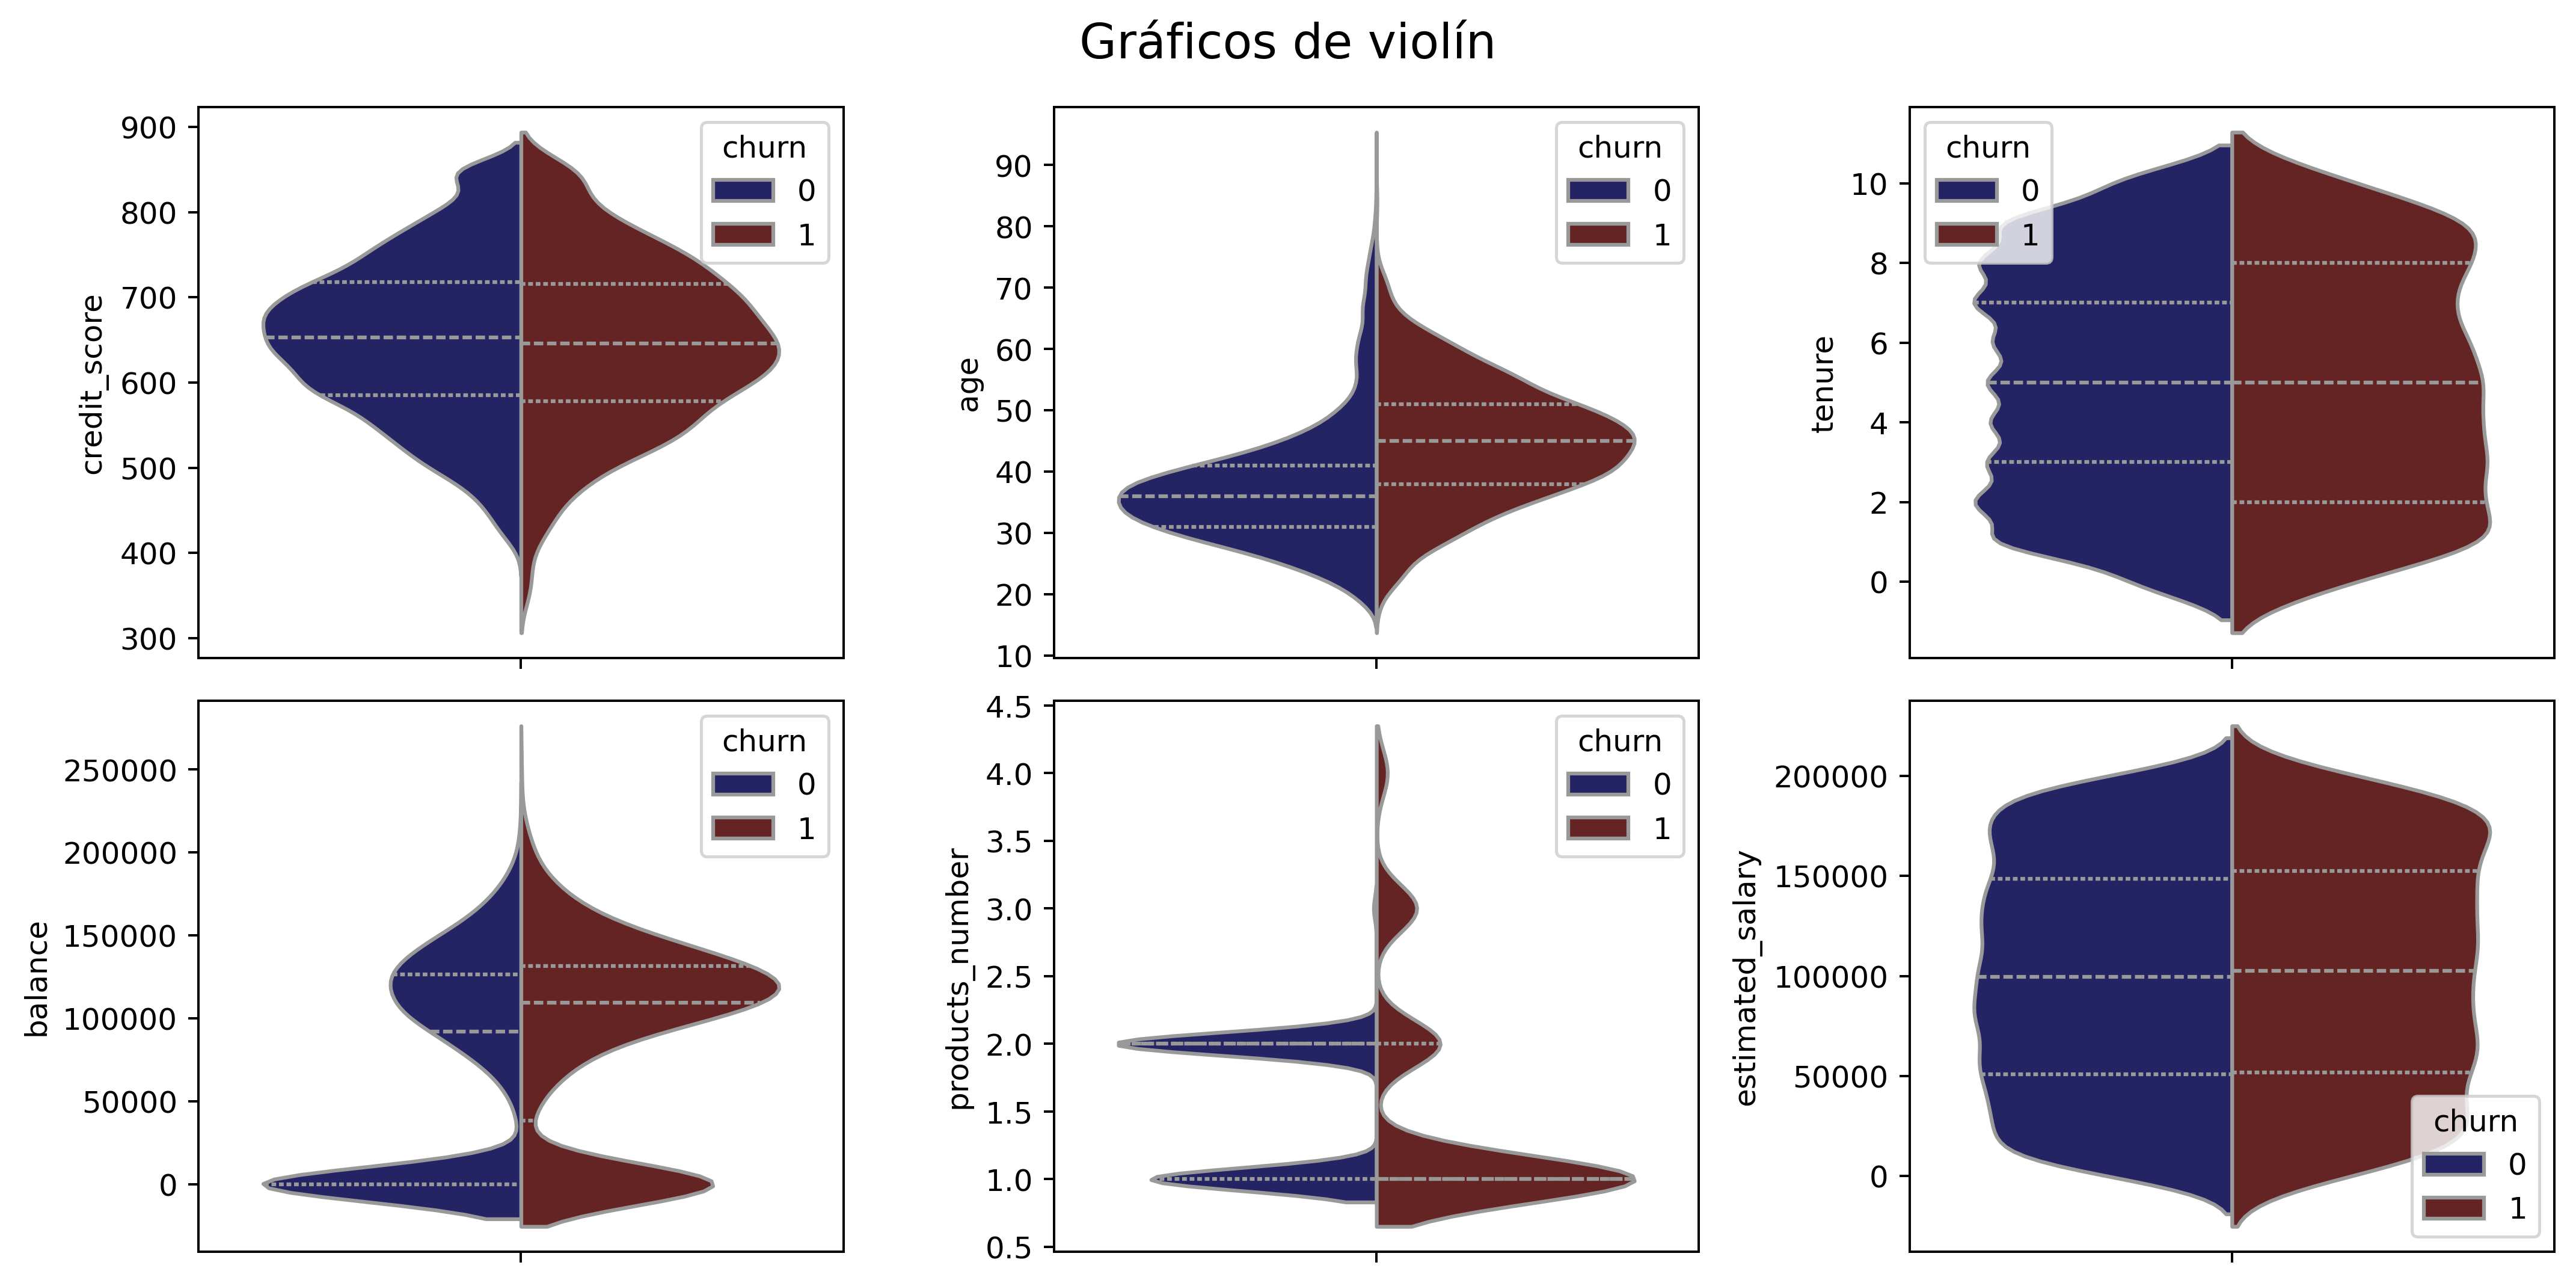

In [85]:
churn_colors = ['#191970', '#701919']
    
fig, axs = plt.subplots(nrows = 2, ncols = 3, dpi = 360, figsize = (12,6))
fig.suptitle('Gráficos de violín', fontsize = 16)
for i, var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    sns.violinplot(data=df_raw, y=var, hue = 'churn',
                   palette=churn_colors, split=True, inner='quart', ax = axs[row][col], fill = True, linecolor = '#999999')
    axs[row][col].set_ylabel(var)
plt.tight_layout()
plt.show()


A partir de los gráficos de violín generados, es posible extraer algunas observaciones relevantes sobre el comportamiento de los clientes que abandonan o permanecen en la institución financiera. A continuación, se presentan los principales hallazgos junto con preguntas que permitirán realizar un análisis estadístico posterior:

**Similitud en distribuciones de algunas variables**: A simple vista, las distribuciones de puntaje crediticio (`credit_score`), antigüedad en el banco (`tenure`) y salario estimado (`estimated_salary)` parecen ser similares entre los clientes que abandonaron y los que permanecen en la institución.

- ¿Es esto cierto desde el punto de vista estadístico?
- ¿Qué variables numéricas presentan distribuciones similares entre ambos grupos?

**Edad como posible factor determinante**: Se observa que la mayoría de los clientes que abandonan el banco tienen edades comprendidas entre los 37 y 52 años, con una media cercana a los 44 años.

- ¿Estadísticamente, los clientes que abandonan tienden a ser mayores que los que permanecen?
- ¿Existen otras variables cuya media difiera significativamente entre ambos grupos?

**Relación entre saldo y abandono**: Se observa que la proporción de clientes con un saldo igual a $0 en su cuenta tienen mayor tendencia a permanecer en el banco, mientras que aquellos con saldos superiores a la media muestran una mayor tendencia a abandonarlo.

- ¿Cómo se distribuye el saldo entre los clientes que se quedan y los que se van?

**Número de productos contratados**: En la distribución de clientes que han abandonado el banco, se observa un número considerable de casos con tres o cuatro productos contratados, patrón menos evidente entre los clientes que no han abandonado. Además, la mayoría de los clientes que no han abandonado tienden a tener dos productos, mientras que entre los que sí han abandonado, predomina tener solo un producto.
- ¿Existe evidencia estadística de que los clientes con un solo producto tienen mayor probabilidad de abandonar el banco?
- ¿Cómo se asigna el número de productos a cada cliente?
- ¿Podría tratarse de una estrategia de retención el ofrecer más productos a clientes en riesgo de abandono?
- ¿Existe una relación entre no adquirir más productos y la decisión de abandonar?

En las siguientes secciones se abordarán estas preguntas mediante análisis estadísticos apropiados, con el fin de darle respuesta a las preguntas planteadas a partir de la inspección visual.

#### Similitud en distribuciones de variables

Si bien el gráfico de violín sirve para identificar variaciones en las distribuciones de los datos, el gráfico de la función de distribución acumulada, o *CDF*, permite una comparación entre las distribuciones de las dos clases de manera más clara. A continuación obtenemos los gráficos CDF para las distintas variables.

In [86]:
df_NoChurn  = df_raw[df_raw['churn']==0]
df_Churn  = df_raw[df_raw['churn']==1]

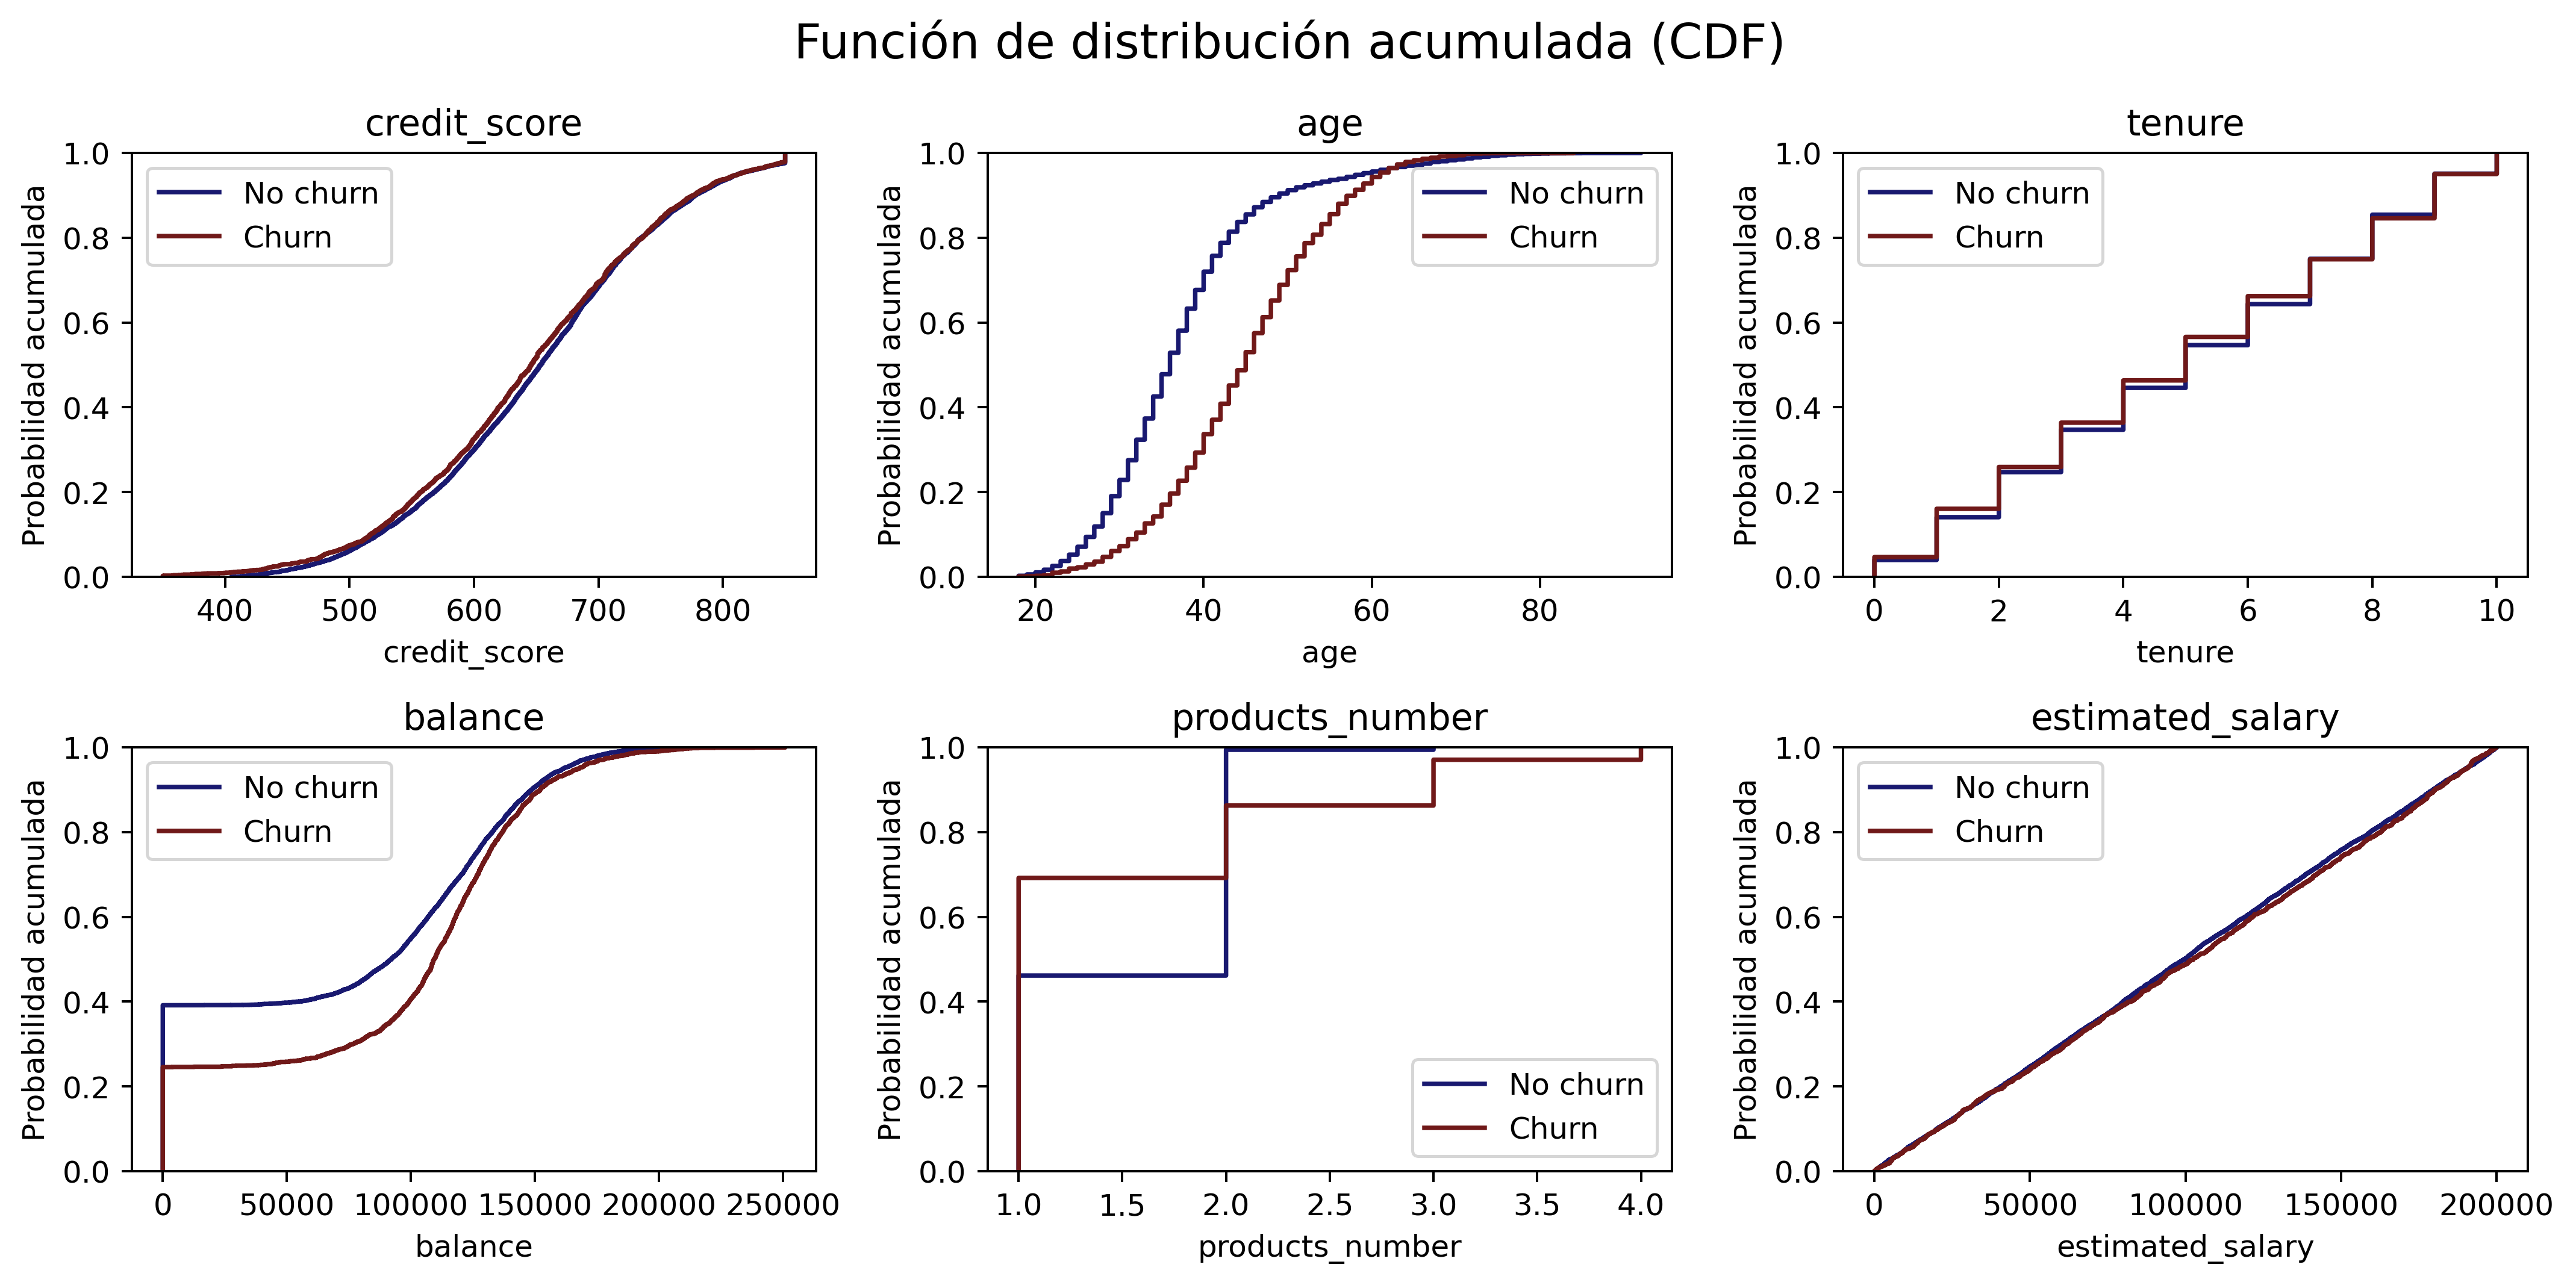

In [87]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(12,6), dpi = 360)
fig.suptitle('Función de distribución acumulada (CDF)', fontsize = 16)
for i,var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    axs[row,col].set_title(var)
    axs[row,col].ecdf(df_NoChurn[var], color = churn_colors[0], label = 'No churn')
    axs[row,col].ecdf(df_Churn[var], color = churn_colors[1], label = 'Churn')
    axs[row,col].legend()
    axs[row,col].set_ylabel('Probabilidad acumulada')
    axs[row,col].set_xlabel(var)
plt.tight_layout()
plt.show()

A partir de estas gráficas se puede comparar las distribuciones de ambos grupo desde otro enfoque. Se observa que la edad media de personas que abandonan la institución financiera es mayor que la edad media de las que permanecen. De igual forma, se observa que alrededor del 40\% de todas las personas que permanecen en el banco tienen $\$0$ en su cuenta, mientras que el porcentaje que abandona con $\$0$ de saldo es solo del 25\%. Por otra parte, se aprecia que el 65\% de personas que abandonan la institución cuentan con un solo producto y que son estas las únicas que cuentan con tres y cuatro productos, viendose la cantidad de productos de las personas que permanecen a lo más tres.

#### Relación entre saldo y abandono

En las gráficas de violín y de CDF se observó que las distribuciones de `balance` de ambos grupos son relativamente parecidas. Se analizará a profundidad esta distribución para ambas clases. Se comparará el histograma de cada clase para esta variable.

In [88]:
min_balance = df_raw['balance'].min()
max_balance = df_raw['balance'].max()

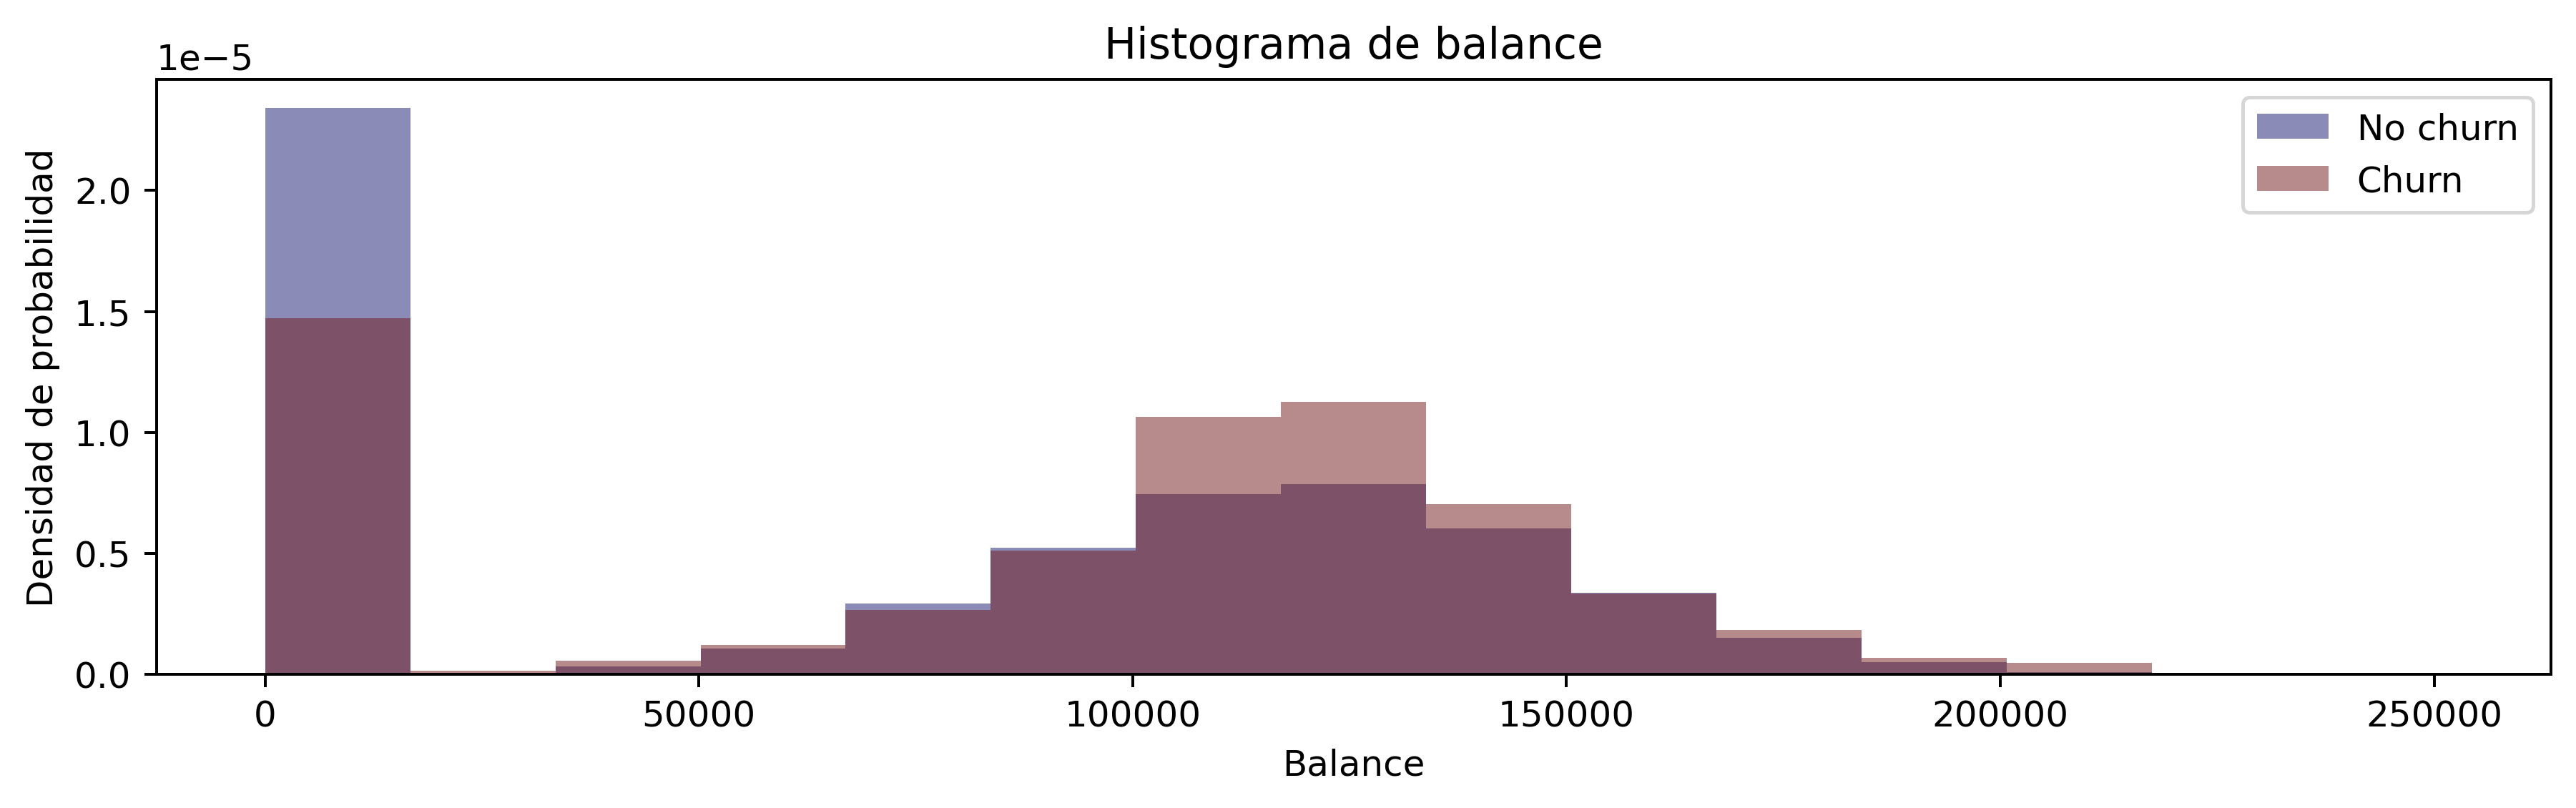

In [89]:
plt.figure(dpi = 360, figsize = (12,3))
plt.hist(df_NoChurn['balance'], bins = 15, color = churn_colors[0], range = [min_balance, max_balance], label = 'No churn', density = True, alpha =0.5)
plt.hist(df_Churn['balance'], bins = 15,   color = churn_colors[1], range = [min_balance, max_balance], label = 'Churn', density = True, alpha = 0.5)
plt.legend()
plt.xlabel("Balance")
plt.ylabel("Densidad de probabilidad")
plt.title('Histograma de balance')
plt.show()

Se puede observar que la distribución central de datos es parecida para ambas clases, con la unica diferencia de que existe una gran cantidad de clientes con un saldo de $\$0$ en sus cuentas, siendo mayor el porcentaje de clientes que permanecen con respecto al porcentaje que abandona el banco. Para observar similitudes, se graficará el conjunto de datos para aquellos clientes que tengan un saldo mayor a $0.

In [90]:
NonZeroBalance_NoChurn = df_NoChurn[df_NoChurn['balance'] > 0]['balance']
NonZeroBalance_Churn = df_Churn[df_Churn['balance'] > 0]['balance']

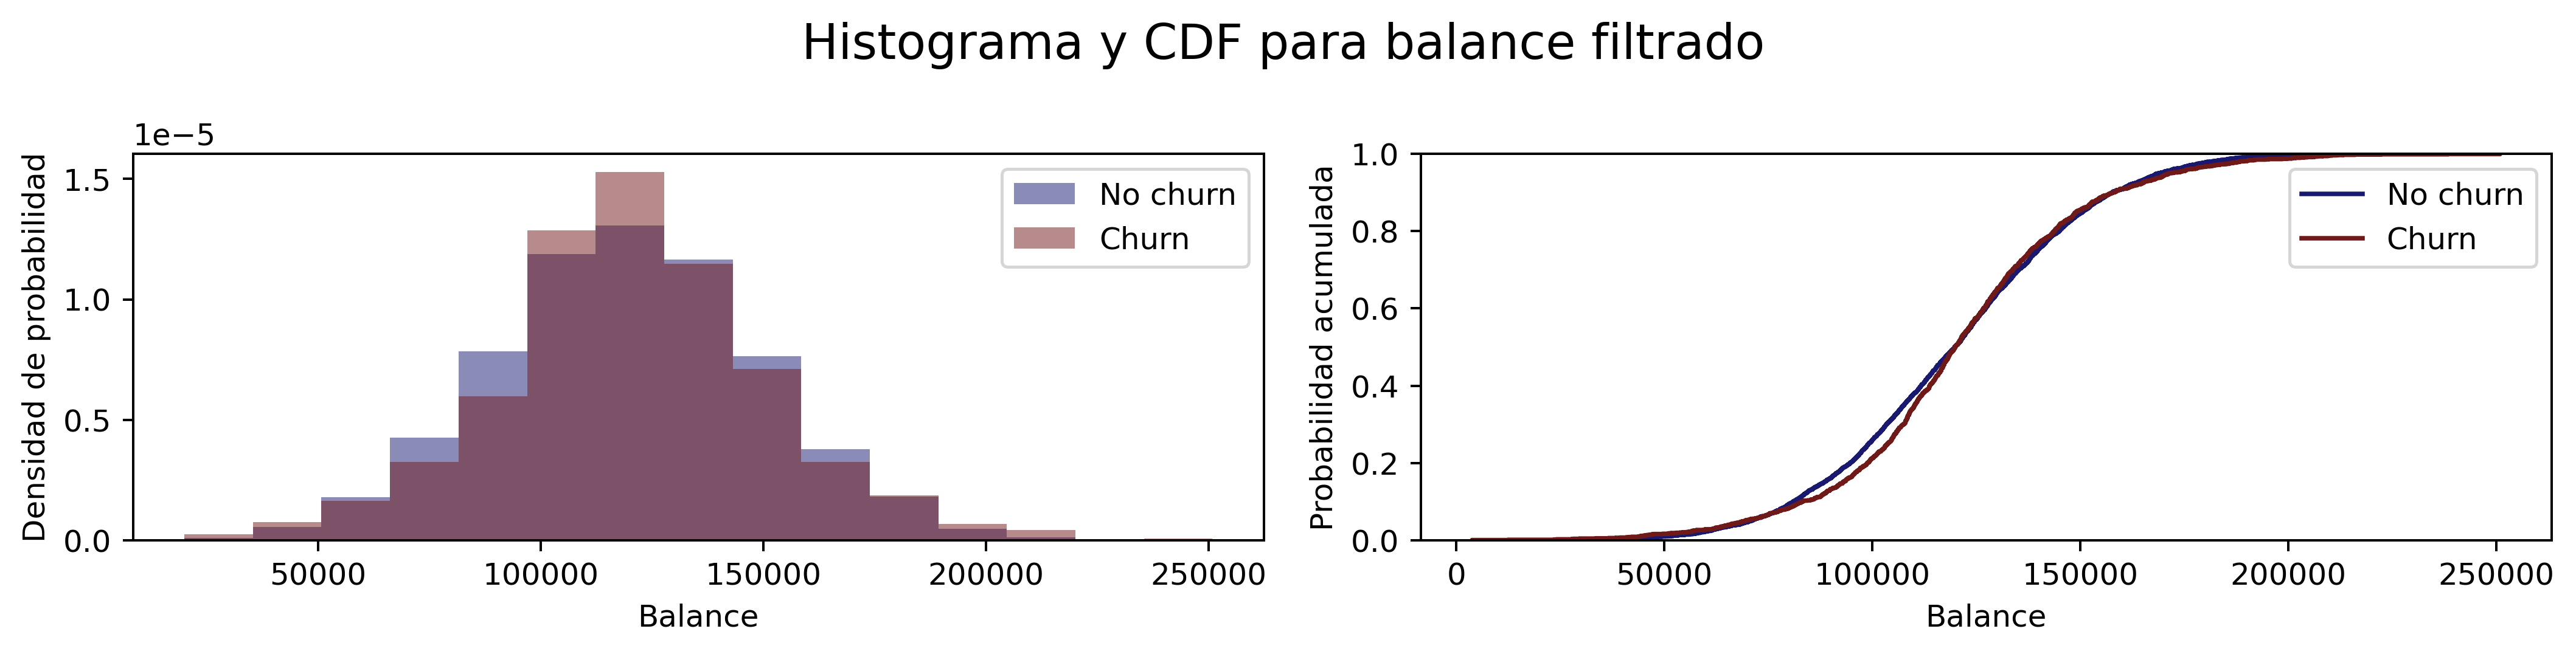

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=360, figsize=(12, 3))
fig.suptitle('Histograma y CDF para balance filtrado', fontsize = 16)
axs[0].hist(NonZeroBalance_NoChurn, bins=15, color=churn_colors[0], range=[20000, max_balance], label="No churn",  density = True, alpha = 0.5)
axs[0].hist(NonZeroBalance_Churn, bins=15, color=churn_colors[1], range=[20000, max_balance], label="Churn",  density = True, alpha = 0.5)
axs[0].set_xlabel("Balance")
axs[0].set_ylabel("Densidad de probabilidad")
axs[0].legend()
sns.ecdfplot(NonZeroBalance_NoChurn, ax=axs[1], color=churn_colors[0], label="No churn")
sns.ecdfplot(NonZeroBalance_Churn, ax=axs[1], color=churn_colors[1], label="Churn")
axs[1].set_xlabel("Balance")
axs[1].set_ylabel("Probabilidad acumulada")
axs[1].legend()
plt.tight_layout()
plt.show()


Las gráficas del histograma y de la función de distribución acumulada para la variable `balance` muestran que las distribuciones son similares entre los clientes que abandonan y los que permanecen en el banco. Esto sugiere que, entre clientes que tienen un saldo mayor a $\$0$, no hay diferencias significativas en el comportamiento financiero que permitan distinguir a los clientes según su decisión de permanecer o abandonar la institución. Con esta observación, se plantea lo siguiente:
- ¿La media de clientes que poseen un saldo mayor a $\$0$ es distinta entre clientes que abandonan o permanecen en la institución?
- ¿Es posible extraer información relevante con la concentración de clientes con un saldo de $\$0$?

#### Número de productos por clase

En las gráficas anteriores, se observó que solo los clientes que habían abandonado el banco contaban con 3 o 4 productos, mientras que los que no tenían a lo más 3 productos. De igual forma, en la gráfica de CDF de `products_number`se observó que alrededor del 70\% de clientes que han abandodando contaban unicamente con un producto, mientras que de los que no habían abandonado solo el 45\% tenía un sólo producto. A partir de estas observaciones surgen las siguientes preguntas:

- ¿Existen clientes de *alto valor* que el banco detecta que podrían abandonar la institución y como manera de retención de cliente se les ofrece una mayor cantidad de productos?
- ¿Clientes que abandonaron regresaron posteriormente debido a que el banco les ofreció más productos?
- ¿Los clientes decidieron abandonar después de solicitar un determinado servicio?
- ¿Existe un gran porcentaje de abandono por parte de clientes que solo cuentan con un solo producto debido a que la institución no les proporciona estas prestaciones?
- ¿Cuáles son los criterios que el banco sigue para asignar una determinada cantidad de productos?

Para tratar de darle luz a estas preguntas, se analizarán las distribuciones para distintas variables continuas considerando el número de productos que poseen los clientes.

In [92]:
numerical_vars.remove('products_number')

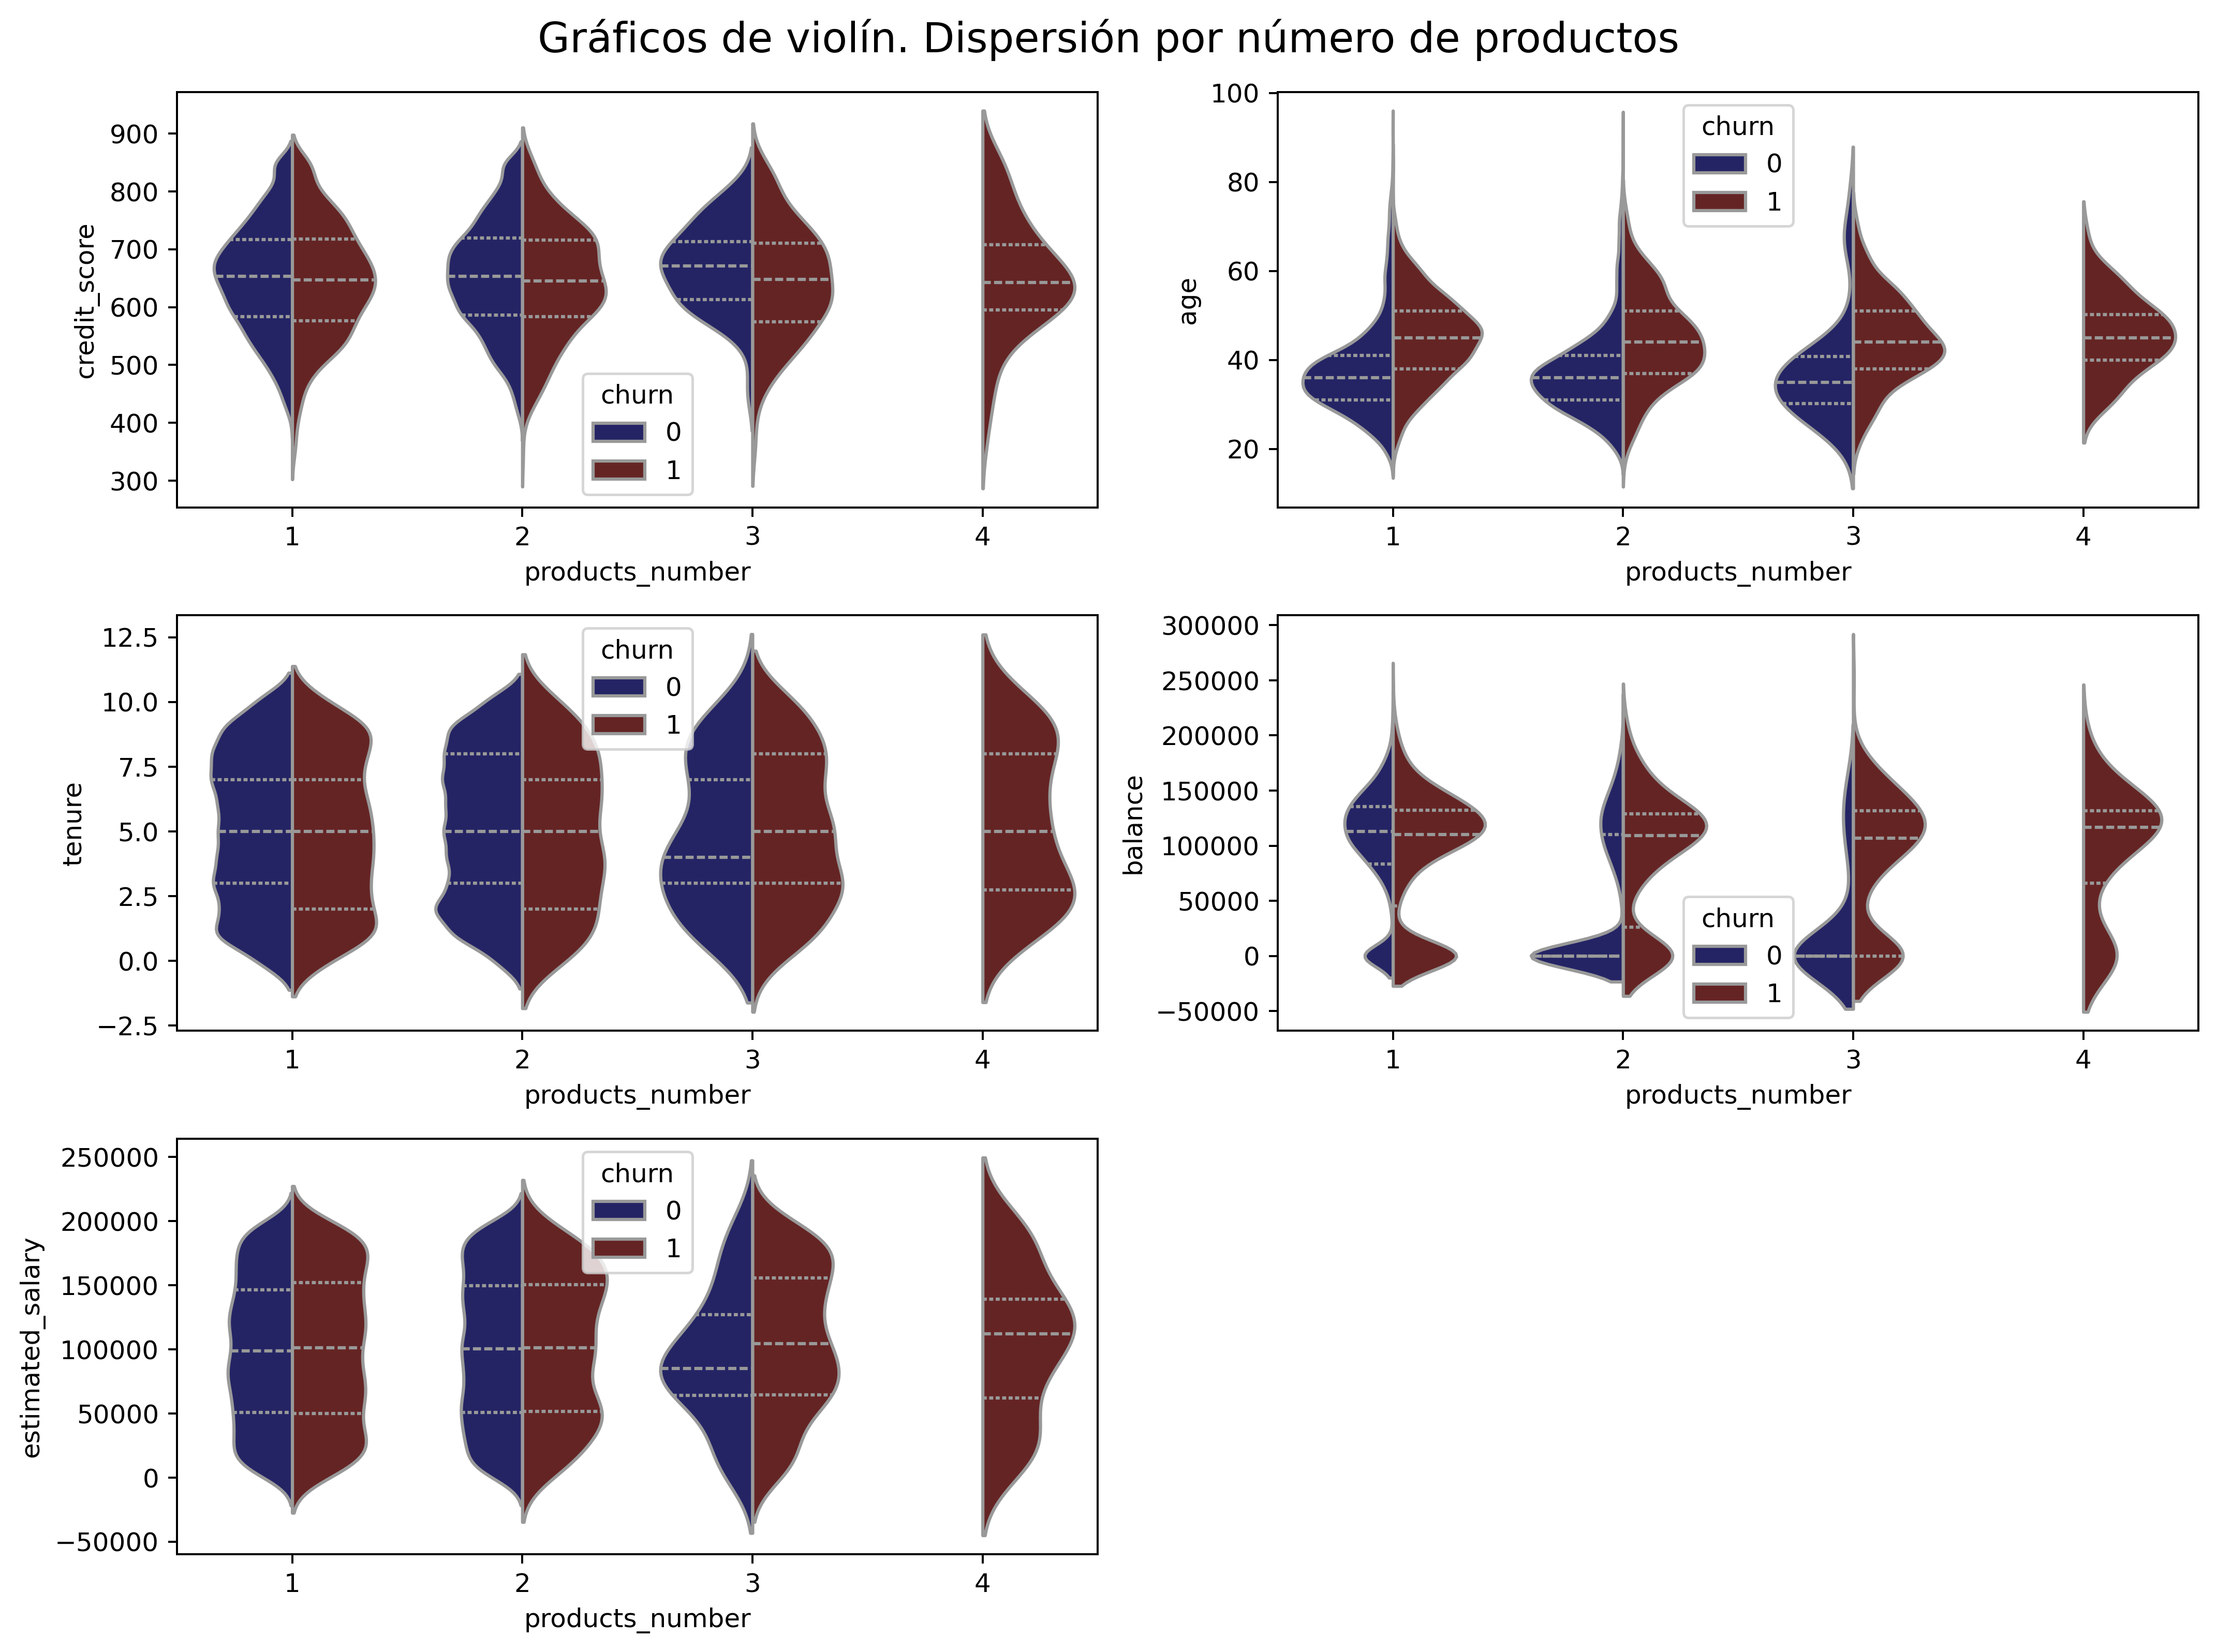

In [93]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, dpi = 360, figsize = (12,9))
fig.suptitle('Gráficos de violín. Dispersión por número de productos', fontsize = 16)
for i, var in enumerate(numerical_vars):
    row, col = divmod(i,2)
    sns.violinplot(data=df_raw, y=var, hue ='churn' , x = 'products_number',
                   palette=churn_colors, split=True, inner='quart', fill = True, linecolor = '#999999', ax = axs[row, col])
    axs[row][col].set_ylabel(var)
fig.delaxes(axs[2, 1])
plt.tight_layout()
plt.show()

A partir de las gráficas se pueden establecer las siguientes observaciones:
- La más evidente: Todos los clientes que poseen 4 productos son clientes que han abandonado la institución en algún momento.
- El `credit_score` parece no tener relevancia para la asignación del número de productos.
- La variable `age` parece no tener relevancia para la asignación del número de productos.
- Los años de antigüedad `tenure` parece no tener relevancia para la asignación del número de productos.
- Existe un gran porcentaje de clientes que deciden abandonar el banco cuando tienen un sólo producto y no tienen saldo en su cuenta bancaria. Por su parte, la cantidad de saldo ingresado en cuenta (`balance`) parece no ser relevante para la asignación del número de productos para personas que no han abandonado, pues para clientes con 2 o 3 productos su saldo promedio es de $\$0$.
- El `estimated_salary` parece no tener relevancia para la asignación del número de productos.

En principio, no es posible determinar a simple vista que variables cambian para poseer una determinada cantidad de productos. Lo unico relevante de este análisis es que existe una gran deserción de clientes con un sólo producto y que la mayoría de clientes que no han abandonado, y que tienen saldo $\$0$ poseen gran cantidad de productos, a comparación de clientes han abandonado que parece una tendencia más normal.

*Se sugiere implementar un modelo que permita determinar cómo se están asignando los numeros de productos ya que, en principio, parecen otorgarse de manera independiente. Además, sería conveniente tener una variable adicional que permita identificar que clientes abandona la institución y posteriormente se vuelven a incorporar para observar las métricas que cambia el banco con estos. Se sugiere el uso de variables binarias para determinar si el cliente tiene un servicio en especifico en lugar de número de productos*

### Análisis de variables categóricas

In [94]:
categorical_vars = ['country', 'gender', 'credit_card', 'active_member']

#### Gráfica de barras

Se graficará una figura de barras para cada una de las variables categóricas, separadas en su respectivas clase (abandono o permanencia), lo cual permitirá analizar su distribución de datos.

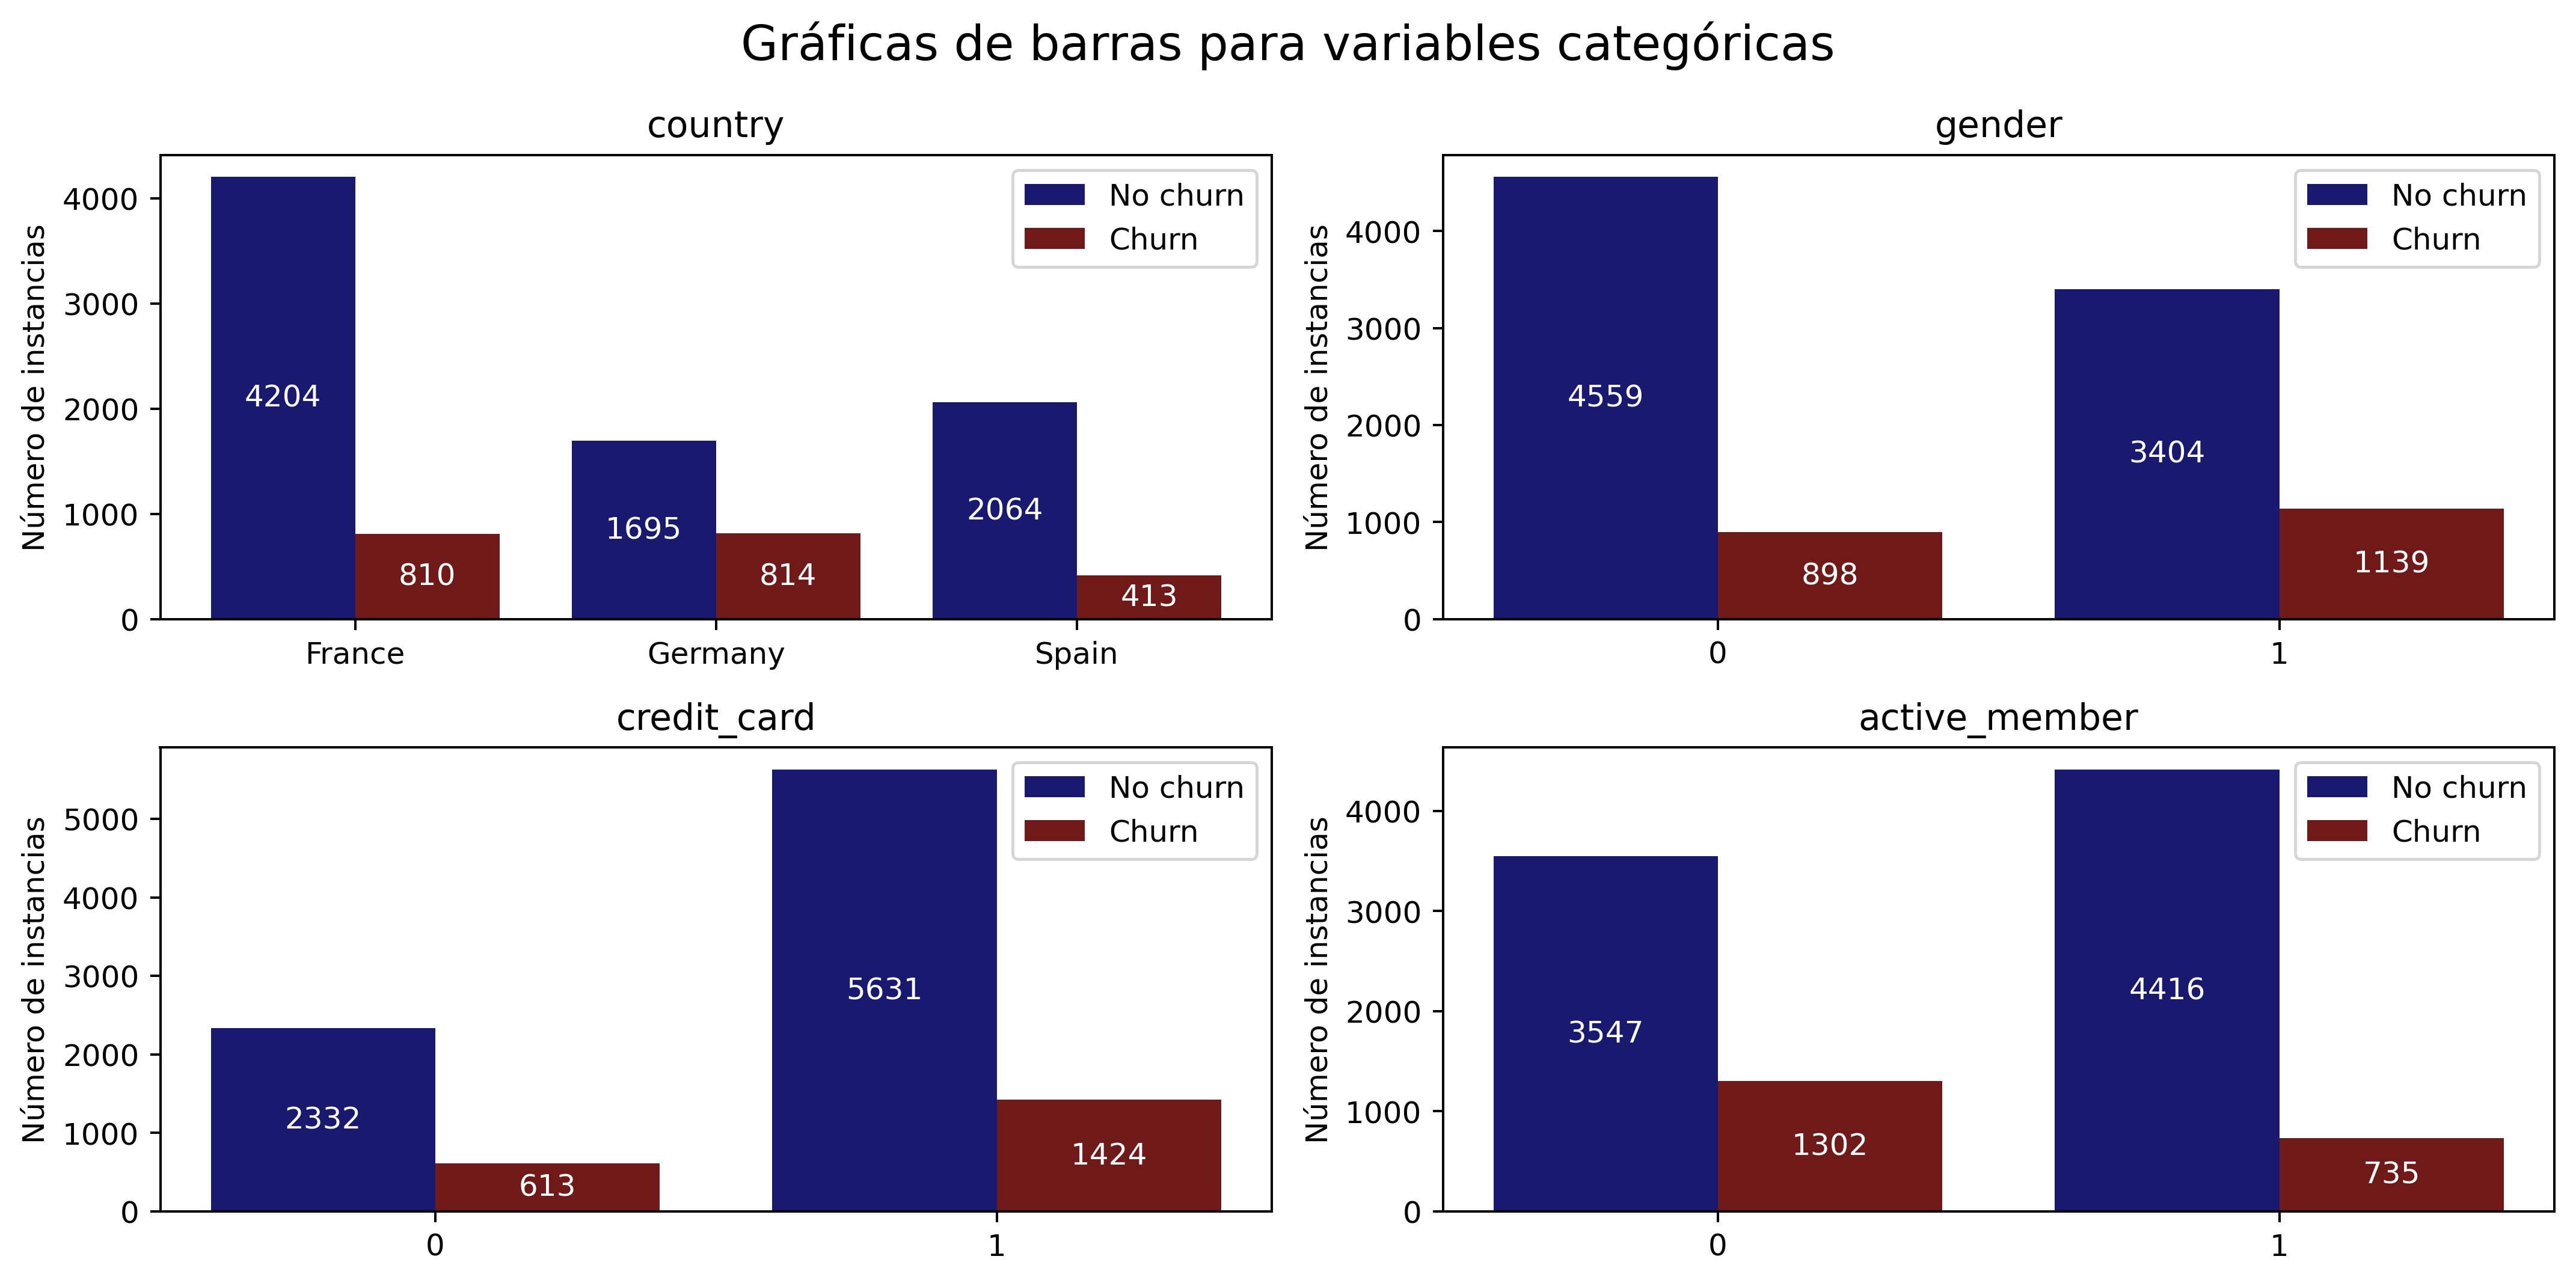

In [95]:
width = 0.4
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6), dpi = 360)
for i, var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    classes = np.sort(df_raw[var].unique()).tolist()
    data = np.zeros(len(classes))
    x_pos = np.arange(len(classes))
    for churn in range(2):
        for j, label in enumerate(classes):
            data[j] = ((df_raw[var]==label) & (df_raw['churn']==churn)).sum()
        offset = width * churn
        label_churn = 'Churn' if churn else 'No churn'
        p = axs[row,col].bar(x_pos + offset, data, width, label = label_churn, color = churn_colors[churn])
        axs[row, col].bar_label(p, fmt='%.0f', label_type='center', color = 'White')
    axs[row,col].set_title(var)
    axs[row,col].set_ylabel('Número de instancias')
    axs[row,col].set_xticks(x_pos + width/2, classes)
    axs[row,col].legend()
plt.suptitle('Gráficas de barras para variables categóricas', fontsize = 16)
plt.tight_layout()
plt.show()

De igual forma que se hizo con las variables continuas, a partir de las gráficas de barras se extraerán algunas observaciones relevantes sobre el comportamiento de los clientes que abandonan o permanecen en la institución financiera. A continuación, se presentan los principales hallazgos junto con preguntas que permitirán realizar un análisis estadístico posterior:

**Diferencias por país de origen:** La mayor cantidad de clientes provienen de Francia, siendo España el país con menos clientes inscritos al banco. Sin embargo, se observa que las proporiciones para de abandono y permanencia en Francia y España es la misma (aproximadamente una relación de abandono 1:5), sin embargo esto cambia para alemania, teniendo más clientes que abandonan (aproximadamente una relación 1:2)
- ¿Es posible afirmar estadísticamente que los clientes alemanes suelen abandonar más que los otros clientes?
- ¿La tasa de abandono entre clientes de Francia y España es equivalente entre ellas?

**Variaciones por género:** Si bien, la mayoría de clientes son del género masculino, el porcentaje de hombres que abandonan la institución es menor que el procentaje de mujeres que abandonan.
- ¿Estadísticamente existe una diferencia entre el porcentajes de mujeres y hombres que abandonan?

**Posesión de tarjeta de credito:** Un gran porcentaje de clientes tiene tarjeta de crédito, sin embargo, se debe revisar si las proporciones son similares entre clientes que tienen y abandonan y clientes que no tienen y abandonan.
- ¿Estadísticamente las proporciones son distintas para la variable de `credit_card`?

**Actividad y abandono:** Los clientes que se consideran activos poseen una bajo porcentaje de abandono, por el contrario, los clientes que no son considerados activos tienen una mayor tendencia al abandono, a pesar de que el conjunto 'No activo' es menor.
- ¿Es la variable de actividad útil para predecir si un cliente abandonará o no la institución?

#### Gráfica de barras apiladas
Para poder descubrir patrones y factores que contribuyen en mayor medida al abandono de manera visual, se realizarán figuras de gráfica de barras apiladas las cuales permitirán observar las diferencias entre las proporciones en distintas variables y clases.

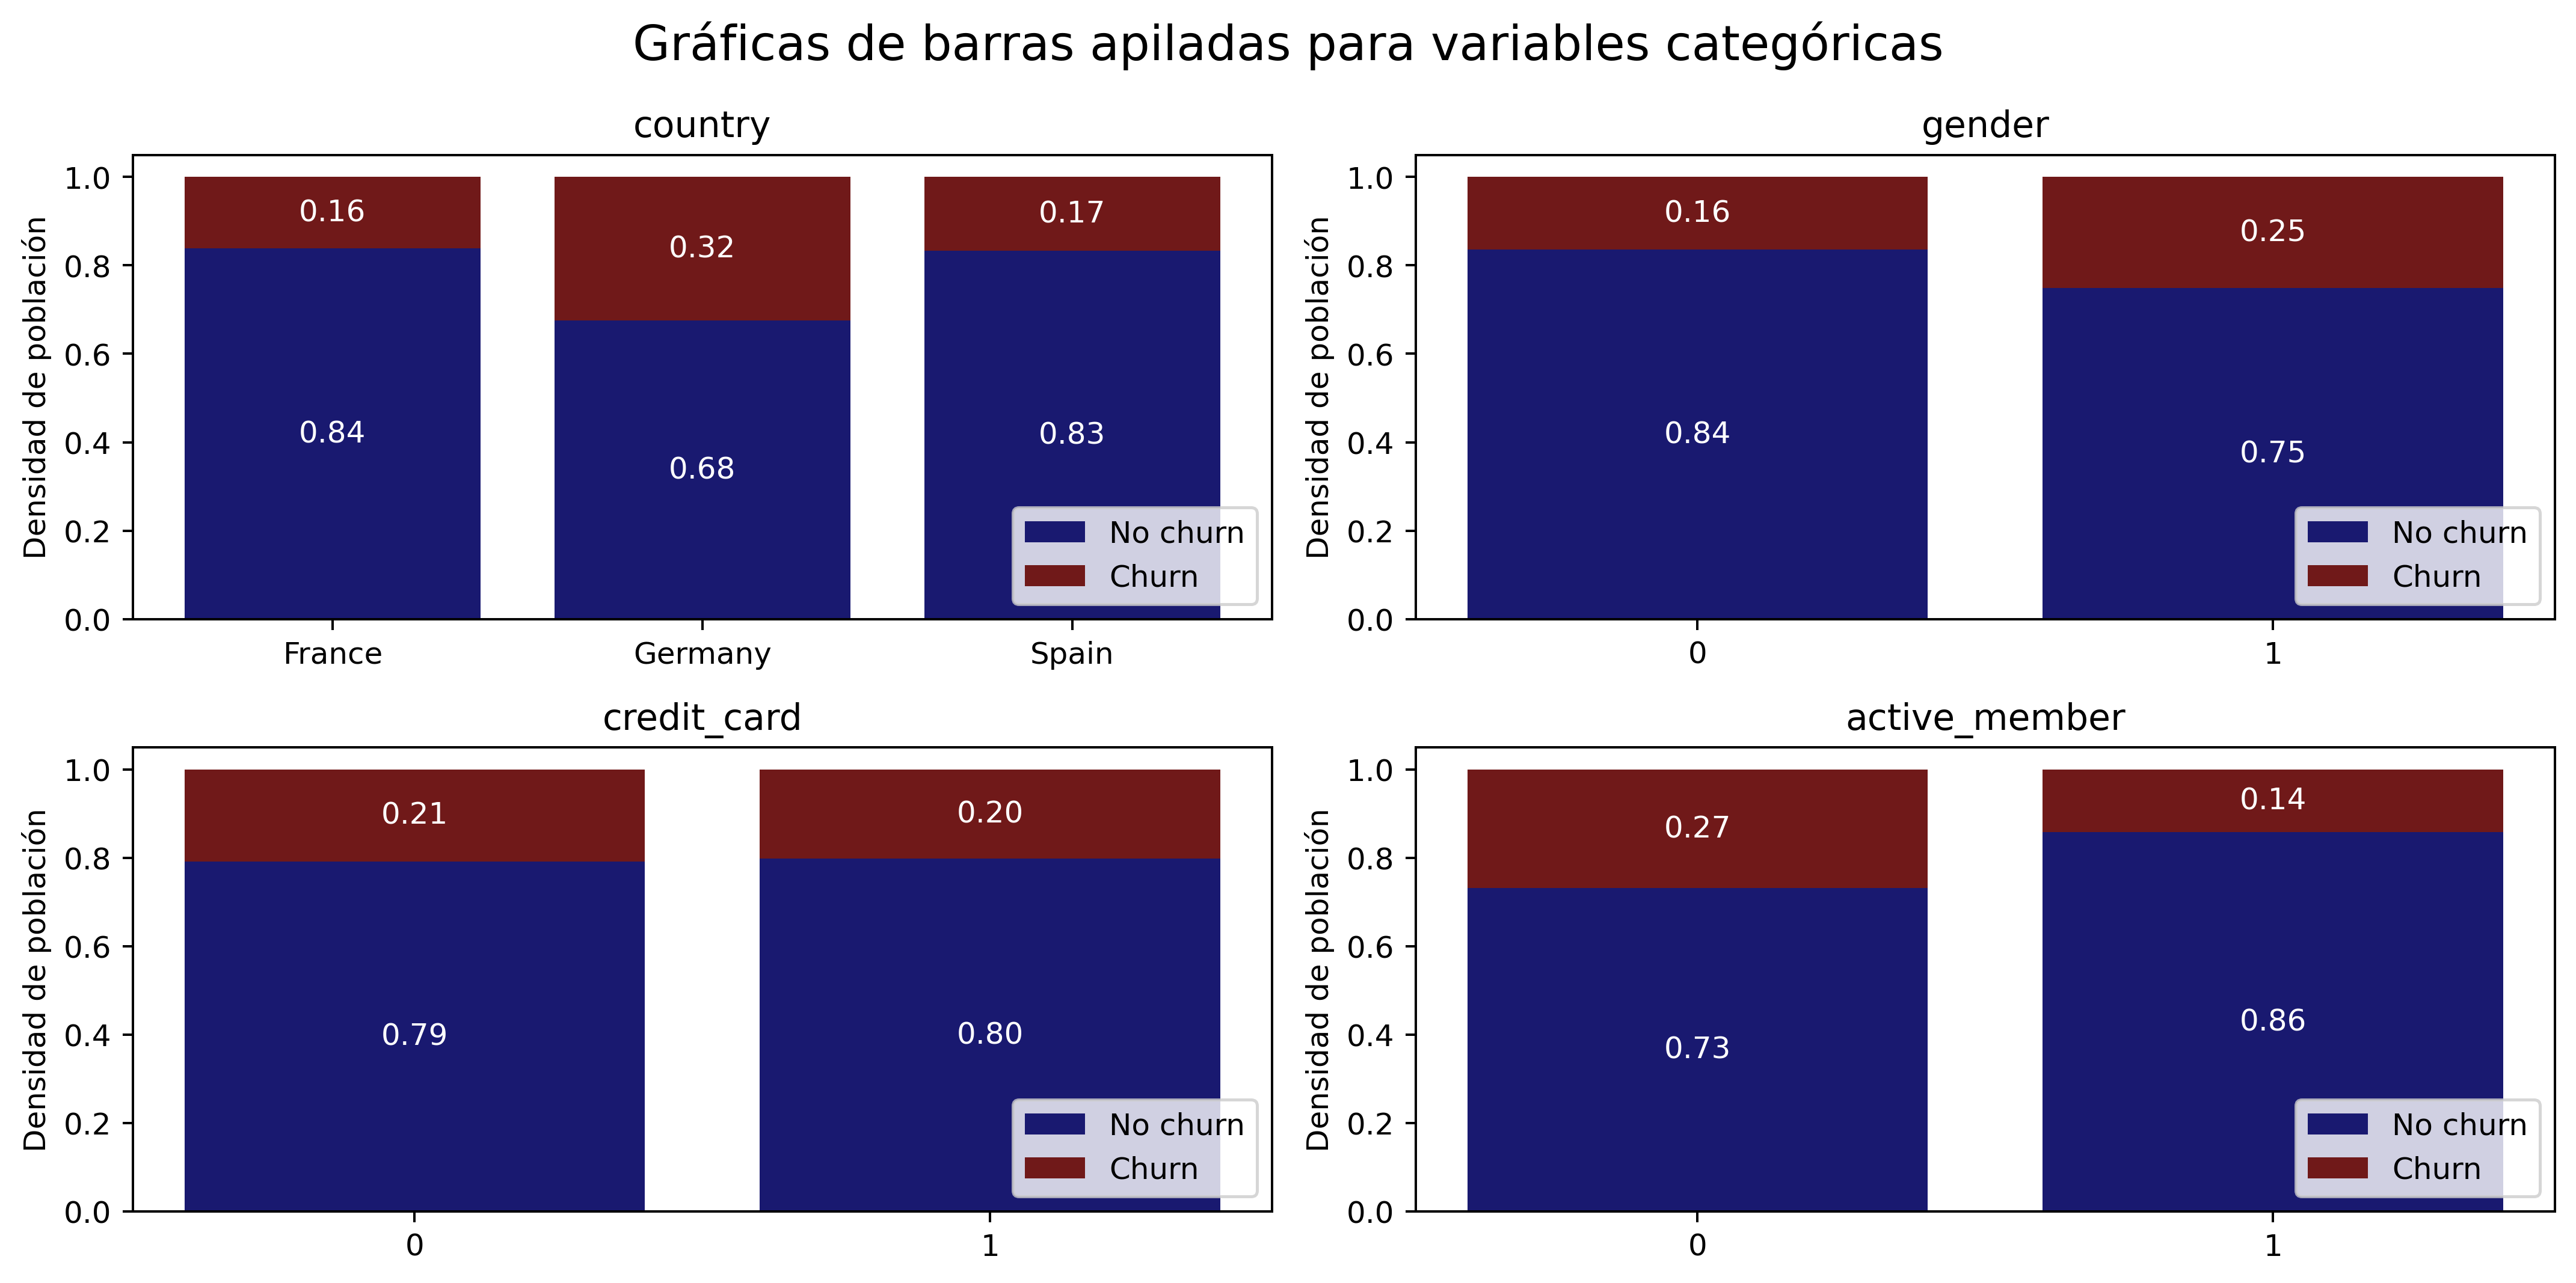

In [96]:
width = 0.8

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6), dpi = 360)
for i, var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    classes = np.sort(df_raw[var].unique()).tolist()
    data = np.zeros((2, len(classes)))
    x_pos = np.arange(len(classes))
    bottom = np.zeros(len(classes))
    for j, label in enumerate(classes):
        data[0,j] = ((df_raw[var]==label) & (df_raw['churn']==0)).sum()
        data[1,j] = ((df_raw[var]==label) & (df_raw['churn']==1)).sum()
    data = data/data.sum(axis = 0)
    for j in range(2):
        label_churn = 'Churn' if j else 'No churn'
        p = axs[row,col].bar(x_pos, data[j,:], width, label = label_churn, color = churn_colors[j], bottom = bottom)
        bottom += data[j,:]
        axs[row, col].bar_label(p, fmt='%.2f', label_type='center', color = 'White')
    axs[row,col].set_title(var)
    axs[row,col].set_ylabel('Densidad de población')
    axs[row,col].set_xticks(x_pos, classes)
    axs[row,col].legend(loc="lower right")
plt.suptitle('Gráficas de barras apiladas para variables categóricas', fontsize = 16)
plt.tight_layout()
plt.show()

Con estas gráficas se pueden observar como se distribuyen las proporciones de clases en las distintas variables, lo que permite realizar las siguientes observaciones:
- Se observa que la mayor proporción de clientes que abandonan son clientes de Alemania, mientras que la proporción de Francia y España es similar entre estas y menor a la de Alemania.
- Se observa que las mujeres tienden a abandonar más la institución bancaria que los hombres.
- Parece ser que poseer tarjeta de credito no afecta la permanencia de clientes.
- La proporción de clientes que abandonan es más grande en los clientes inactivos que activos.

Si bien, es posible destacar estos patrones de manera visual, es necesario realizar un análisis estadístico que valide dichas afirmaciones. Estas pruebas estadísticas se realizarán en las siguientes secciones.

### Resumen de análisis exploratorio preliminar

A continuación, se presenta un resumen de los principales *insights* encontrados a partir del análisis exploratorio:
1. Se observa una similitud entre las distribuciones de clases para las variables `credit_score`, `tenure` y `estimated_salary`
2. La media de edad de las personas que abandonan es mayor a la media de edad de las personas que permanecen.
3. Existe una gran concentración de personas con un saldo de $\$0$ en sus cuentas, siendo en mayor proporción aquellos que tienden a permanecer más
en el banco. Por otro lado, para quienes tienen un saldo mayor a $\$0$ parece no existir diferencias en la distribución.
4. Solo las personas que han abandonado poseen 4 productos, mientras que aquellos clientes que permanecen y tienen $0 en su cuenta tienden a
tener más productos. Se observa que un gran porcentaje de clientes que abandonan tienen un solo producto. *Como sugerencia para implementación a
futuro debe considerarse utilizar esta variable como categórica para idetificar los producto que el cliente posee y revisar de mejor manera las tendencias. También se sugiere implementar una nueva variable que permita identificar si el cliente a abandonado y regresado a la institución*.
5. Los clientes alemanes presentan una mayor tasa de abandono.
6. Existe una mayor cantidad de clientes masculinos, pero la tasa de abandono es más alta en mujeres.
7. Alrededor del 70\% de clientes poseen tarjeta de credito. No es posible marcar una tendencia clara con esta variable.
8. Los clientes considerados como inactivos suelen tener una tasa de abandono más alta.	 

## Partición de los datos

Dado que los datos se encuentran desbalanceados, es necesario realizar una partición estratificada. Para ello, se utilizará la implementación `train_test_split`de *sklearn*, utilizando una partición 70-15-15.

In [97]:
from sklearn.model_selection import train_test_split

X = df_raw.drop(columns = ['churn'])
y = df_raw['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, stratify=y_test, random_state=42)

## Pruebas estadísticas sobre train set

Como se mencionó en el análisis exploratorio, es necesario realizar algunas pruebas estadísticas sobre los datos para validar hipotesis y describir variables que sirvan para predecir el abandono de clientes. Para ello, el conjunto de datos de entrenamiento se dividirá para clientes que hayan abandonado y permanezcan en la institución.

In [98]:
X_NoChurn= X_train[y_train == 0]
X_Churn = X_train[y_train == 1]

### Similitud entre clases: Kolmogorov-Smirnov dos muestras

Se empezará realizando la prueba de *kolmogorov-Smirnov* para comparar las distribuciones de los datos bajo las distintas variables numéricas. Se propone como hipotesis nula (H0) que no hay diferencia significativa entre las distribuciones para clientes que que han abandonodo y permancen en la institución. Esta prueba se realizará con una significancia del 5% para cada una de las variables numéricas

In [99]:
print('-----Prueba Kolmogorov-Smirnov de dos muestras-----')
for var in numerical_vars:
    res = stats.ks_2samp(X_NoChurn[var], X_Churn[var])
    print(f"{var}: p-value = {res.pvalue:.4f}")

-----Prueba Kolmogorov-Smirnov de dos muestras-----
credit_score: p-value = 0.0076
age: p-value = 0.0000
tenure: p-value = 0.7329
balance: p-value = 0.0000
estimated_salary: p-value = 0.0953


Con lo anterior, se obtiene que estadísticamente no hay diferencia significativa entre la distribución de datos de `tenure` y `estimated_salary` para clientes con y sin abandono. Las demás variables numéricas sí presentan diferencias significativas entre las distribuciones de datos para los dos tipos de clientes.

### Tendencias entre clases: Mann-Whitney U

Una prueba no paramétrica para analizar si entre dos conjuntos de datos la tendencia de estos es estadisticamente distinta es la prueba de *Mann-Whitney U*. Se debe de tener cuidado con esta prueba ya que no es exactamente la alternativa no paramétrica de la prueba t, sin embargo, puede ser utilizado de manera aproximada. Implementando esta prueba para cada una de las variables numéricas se obtiene lo siguiente:

In [100]:
print('-----Prueba Mann–Whitney U-----')
for var in numerical_vars:
    res = stats.mannwhitneyu(X_NoChurn[var], X_Churn[var])
    print(f"{var} p-value = {res.pvalue:.4f}")

-----Prueba Mann–Whitney U-----
credit_score p-value = 0.0047
age p-value = 0.0000
tenure p-value = 0.5723
balance p-value = 0.0000
estimated_salary p-value = 0.0704


La prueba de *Mann-Whitney U* indica que no existen diferencias significativas entre las tendencias de los datos en clientes con abandono y permanencias para las variables numéricas `tenure` y `estimated_salary`, mientras que para las demás variables se afirma que estadísticamente la media de los datos para los clientes que abandonan es distinta que la de los que permanecen. 

### Saldo en cuentas de clientes

#### Clientes con saldo en cuenta

Como se mencionó en el análisis exploratorio, existe una gran concentración de clientes que poseen $\$0$ en sus cuentas, siendo mayor la proporción de clientes que permanecían que los que abandonaban. Al filtrar los clientes que tienen saldo en su cuenta, se encontró que la distribución entre grupos era casi normal y muy parecida entre sí. Es por ello que se desea saber si la media, y en general, las distribuciones de los clientes que tienen saldo en sus cuentas es distinta para las dos clases. 

Se realiza el filtrado de datos:

In [101]:
X_NonZero_NoChurn = X_NoChurn[X_NoChurn['balance']>0]['balance']
X_NonZero_Churn = X_Churn[X_Churn['balance']>0]['balance']

Para comparar las medias, se debe revisar si el conjunto de datos sigue una distribución normal. Para ello, se realizará una prueba de Shapiro.

In [102]:
res_NoChurn = stats.shapiro(X_NonZero_NoChurn)
res_Churn = stats.shapiro(X_NonZero_Churn)
print('-----Prueba Shapiro para normalidad-----')
print(f'p-value para balance de clientes que permanecen: {res_NoChurn.pvalue:.4f}')
print(f'p-value para balance de clientes que abandonan: {res_Churn.pvalue:.4f}')

-----Prueba Shapiro para normalidad-----
p-value para balance de clientes que permanecen: 0.9133
p-value para balance de clientes que abandonan: 0.0000


Dado que los dos grupos no siguen una distribución normal, es necesario aplicar una prueba no paramétrica. Debido a esto, se utilizarán las pruebas anteriormente aplicadas para comparar la distribución de saldo (`balance`) entre las clases. 
Se establece como hipotesis nula H0 que no existe diferencia significativa entre la distribución del balance para clientes que abandonan y permanecen.

In [103]:
res = stats.ks_2samp(X_NonZero_NoChurn, X_NonZero_Churn)
print(f"KS: p-value = {res.pvalue:.4f}")
res = stats.mannwhitneyu(X_NonZero_NoChurn, X_NonZero_Churn)
print(f"MWU: p-value = {res.pvalue:.4f}")

KS: p-value = 0.0024
MWU: p-value = 0.2197


Como se puede observar, los datos tienen una distribución significativamente distinta (prueba Kolmogorov-Smirnov), mientras que la tendencia parece no ser significativamente distinta (prueba Mann-Whitney U).

Para comparar esto visualmente, se graficará el histograma y la función de destribución de probabilidad

In [104]:
n = X_Churn.shape[0] + X_NoChurn.shape[0]

n_bins = 1+ np.log2(n) #Regla de Sturges y redondeo
if 0.5 > n_bins - np.floor(n_bins):
    n_bins = int(np.floor(n_bins))
else:
    n_bins = int(np.ceil(n_bins))
    
min_train_balance = X_train['balance'].min()
max_train_balance = X_train['balance'].max()

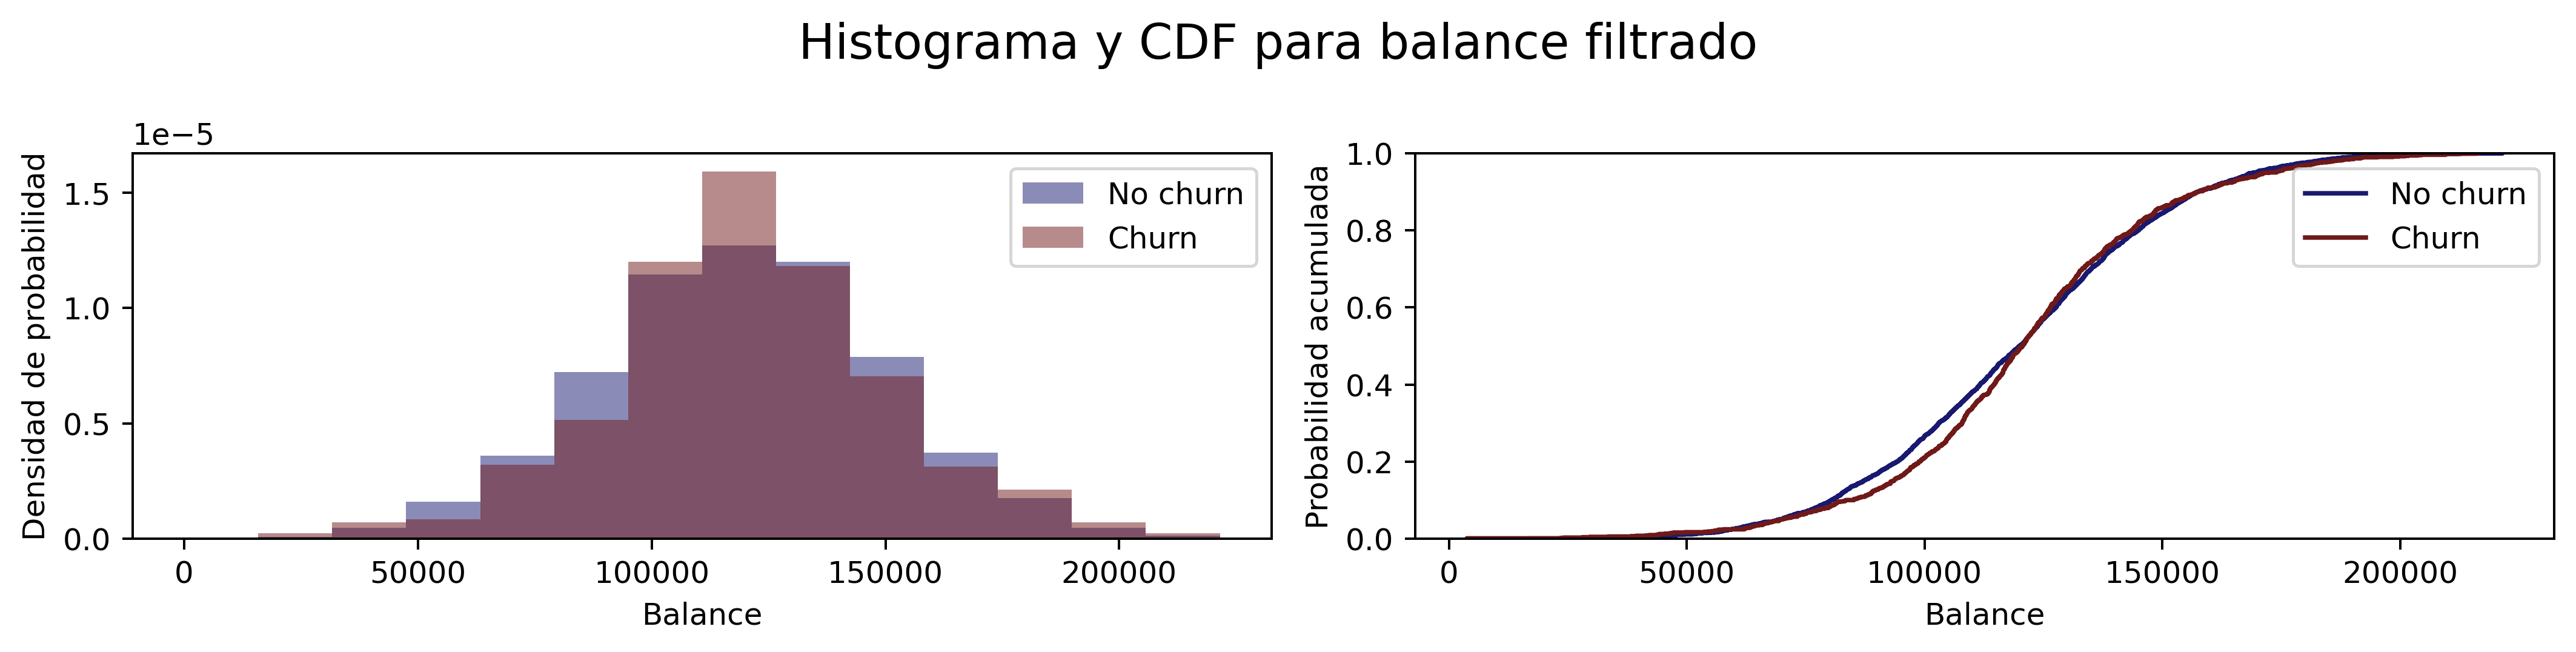

In [105]:
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=360, figsize=(12, 3))
fig.suptitle('Histograma y CDF para balance filtrado', fontsize = 16)
axs[0].hist(X_NonZero_NoChurn, bins=n_bins, range=[min_train_balance, max_train_balance], density = True,
            label="No churn", color=churn_colors[0], alpha = 0.5)
axs[0].hist(X_NonZero_Churn,   bins=n_bins, range=[min_train_balance, max_train_balance], density = True,
            label="Churn", color=churn_colors[1], alpha = 0.5)
axs[0].set_xlabel("Balance")
axs[0].set_ylabel("Densidad de probabilidad")
axs[0].legend()
sns.ecdfplot(X_NonZero_NoChurn, ax=axs[1], color=churn_colors[0], label="No churn")
sns.ecdfplot(X_NonZero_Churn, ax=axs[1], color=churn_colors[1], label="Churn")
axs[1].set_xlabel("Balance")
axs[1].set_ylabel("Probabilidad acumulada")
axs[1].legend()
plt.tight_layout()
plt.show()

Como se puede observar, el histograma permite observar que la tendencia central de los datos se encuentra en el mismo intervalo, entre $\$100000$ y $\$140000$, sin embargo, la gráfica del CDF deja ver diferencias entre como estos valores se encuentran distribuidos. Sin embargo, no es muy clara la diferencia entre los datos, por lo cual no es posible separar correctamente las clases mediante esta variable.

#### Clientes sin saldo en cuenta

Ahora, es momento de analizar si existen diferencias significativas entre el número de clientes que poseen un saldo de $\$0$ en sus cuentas. Para ello, se realizará una prueba $Z$ para proporciones. Para esto, se define la función `z_proportions`.

In [106]:
def z_proportions(n1, n2, x1,x2):
    p = (x1 + x2)/(n1+n2)
    p1 = x1/n1
    p2 = x2/n2
    Z = (p1-p2)/np.sqrt(p*(1-p)*(1/n1+1/n2))
    pvalue = 2*stats.norm.sf(Z)
    res = {'statistics': Z,
            'pvalue': pvalue}
    return res

Para realizar esta prueba, se seleccionan las instancias que cumplen una determinada condición, en este caso, se seleccionan los $x_i$ clientes que no tienen saldo, tienen un saldo de $\$0$ en cuenta, para las $i$ clases (permanencia y abandono). Por otro lado, es necesario comparar con respecto al tamaño $n_i$ al que cada clase pertenece.

Para esta prueba, se toma como hipotesis nula (H0) que no existen diferencias significativas entre las proporciones de ambos grupos. Realizando la prueba estadística con una significancia del 5% se obtiene que

In [107]:
n1, n2= X_NoChurn.shape[0], X_Churn.shape[0]
x1, x2 = (X_NoChurn['balance']==0).sum(), (X_Churn['balance']==0).sum()

res = z_proportions(n1,n2,x1,x2)
print(f"pvalue: {res['pvalue']:.4f}")

pvalue: 0.0000


Dado que el pvalue es menor, se concluye de que sí existen diferencias significativas entre las proporciones de clientes que tienen un saldo de $\$0$ para aquellos que abandonan o permanecen. Debido a esto, es conveniente agregar una variable categórica que permita identificar cuando un cliente posee un balance activo o inactivo.

In [169]:
X_train['active_balance'] = 1*(X_train['balance']>0)

### Correlaciones entre variables

Para observar, si existen correlaciones entre las distintas variables se realizará una grafica de correlaciones para observar patrones en los distintos grupos de clientes. 

In [111]:
numerical_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

corr_churn = X_Churn[numerical_vars].corr()
corr_no_churn = X_NoChurn[numerical_vars].corr()

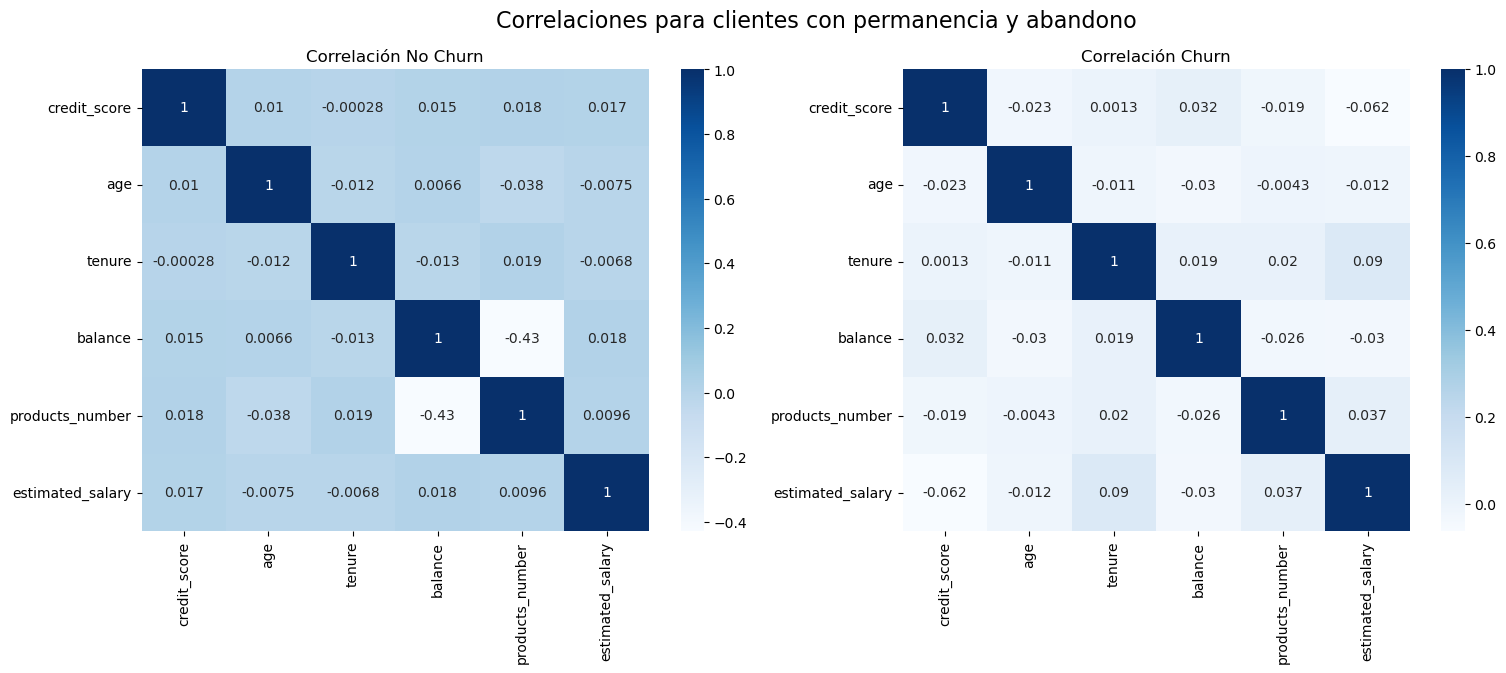

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(18,6))
plt.suptitle('Correlaciones para clientes con permanencia y abandono', fontsize = 16)
sns.heatmap(corr_no_churn, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Correlación No Churn')
sns.heatmap(corr_churn, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Correlación Churn')
plt.show()

Como se puede observar, la única variable que parece estar correlacionada de manera descendente es el número de productos y balance para las personas que no han abandonado. Esta correlación se puede observar en la figura del gráfico de violín donde se presentan las distribuciones por número de productos. Se observa que para el balance existe una asignación mayor de productos aquellas cuentas que tienen un saldo de $\$0$. Sin embargo, como se mencionó, esto solo ocurre para las personas que no han abandonado. Parece no existir correlaciones claras para las demás variables en clientes que han abandonado. 

### Variables categóricas discriminantes: Prueba $\chi^2$

Una vez analizadas las distribuciones con las variables numéricas, se analizarán las distribuciones con las variables categóricas, para ello, se analizaran las diferencias entre grupos utilizando la prueba $\chi^2$.

In [173]:
categorical_vars = ['country', 'gender', 'credit_card', 'active_member', 'active_balance']

Se propone como hipótesis nula H0 que el estado del cliente (permanece o abandona) es independiente de la variable analizada.

In [189]:
for var in categorical_vars:
    tabla = pd.crosstab(X_train[var], y_train)
    chi2 = stats.chi2_contingency(tabla, correction=(tabla.shape == (2,2)))
    print(f"{var}: pvalue = {chi2.pvalue:.4f}")

country: pvalue = 0.0000
gender: pvalue = 0.0000
credit_card: pvalue = 0.5885
active_member: pvalue = 0.0000
active_balance: pvalue = 0.0000


Los resultados obtenidos indican que sólo `credit_card` es independiente del estado del cliente, por lo que en las demás variable sí existe un grado de dependencia entre que un cliente permanezca o abandone.

### Independencia entre variables categóricas: Prueba $\chi^2$

Es interesante observar, al igual como se realizó con las variables numéricas, si existen dependencias entre las distintas variables categóricas. Para ello, se realizaran pruebas de $\chi^2$ sobre cada una de las distintas variables.
Se establece como H0 que la variable 1 y la variable 2 son estadisticamente independientes.

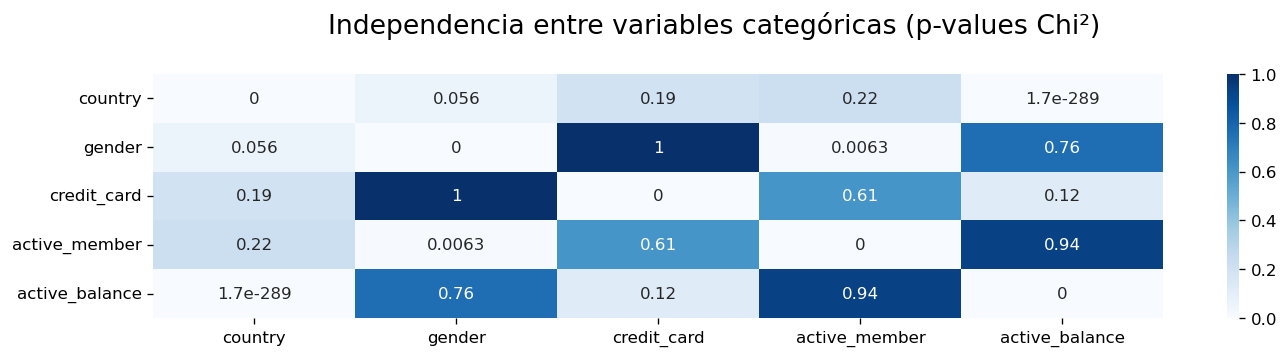

In [188]:
# Inicializar matriz
tabla = np.zeros((len(categorical_vars), len(categorical_vars)))

# Calcular p-values de independencia (chi²)
for row, var1 in enumerate(categorical_vars):
    for col, var2 in enumerate(categorical_vars):
        crosstab = pd.crosstab(X_train[var1], X_train[var2])
        correction = crosstab.shape == (2, 2)  # aplicar corrección de Yates solo en tablas 2x2
        chi2 = stats.chi2_contingency(crosstab, correction=correction)
        tabla[row, col] = chi2.pvalue

# Mostrar heatmap de p-values
plt.figure(figsize=(12, 3), dpi = 120)
plt.suptitle('Independencia entre variables categóricas (p-values Chi²)', fontsize=16)
sns.heatmap(tabla, annot=True, cmap='Blues', xticklabels=categorical_vars, yticklabels=categorical_vars)
plt.tight_layout()
plt.show()

### Actividad del cliente

En principio, se podría asumir que un cliente se encuentra activo por alguna de las siguientes razones:
- El cliente ha utilizado su tarjeta de credito (lo que implicaría que el cliente tiene tarjeta de credito)
- El cliente ha ingresado (o retirado) dinero a su cuenta (`balance` es mayor a 0 o igual a 0)

In [ ]:
Sin embargo, que existe la misma proporción no significa que sea el mismo porcentaje de clientes los cuales realicen lo mismo. Es por ello que se realizará un análisis de dependencia entre estas dos variables mediante una prueba $\chi^2$ para las distintas clases de pertenencia.

In [150]:
Active_card = X_train['active_member']*X_train['credit_card']

In [172]:
tabla = pd.crosstab(X_train['active_balance'], y_train)
chi2 = stats.chi2_contingency(tabla, correction=(tabla.shape == (2,2)))
print(f"pvalue = {chi2.pvalue:.16f}")

pvalue = 0.0000000000000000


In [162]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_preds = [X_train['active_member']*X_train['credit_card'], X_train['active_member'], X_train['credit_card']]

for y_pred in y_preds:
    # Matriz de confusión
    cm = confusion_matrix(y_train, y_pred)
    print("Matriz de Confusión:\n", cm)
    
    # Métricas básicas
    print("\nReporte de Clasificación:\n", classification_report(y_train, y_pred, digits=4))
    
    # Accuracy total
    acc = accuracy_score(y_train, y_pred)
    print(f"Accuracy: {acc:.4f}")

Matriz de Confusión:
 [[3370 2204]
 [1080  346]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0     0.7573    0.6046    0.6724      5574
           1     0.1357    0.2426    0.1740      1426

    accuracy                         0.5309      7000
   macro avg     0.4465    0.4236    0.4232      7000
weighted avg     0.6307    0.5309    0.5709      7000

Accuracy: 0.5309
Matriz de Confusión:
 [[2481 3093]
 [ 900  526]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0     0.7338    0.4451    0.5541      5574
           1     0.1453    0.3689    0.2085      1426

    accuracy                         0.4296      7000
   macro avg     0.4396    0.4070    0.3813      7000
weighted avg     0.6139    0.4296    0.4837      7000

Accuracy: 0.4296
Matriz de Confusión:
 [[1622 3952]
 [ 426 1000]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0     0.7920   

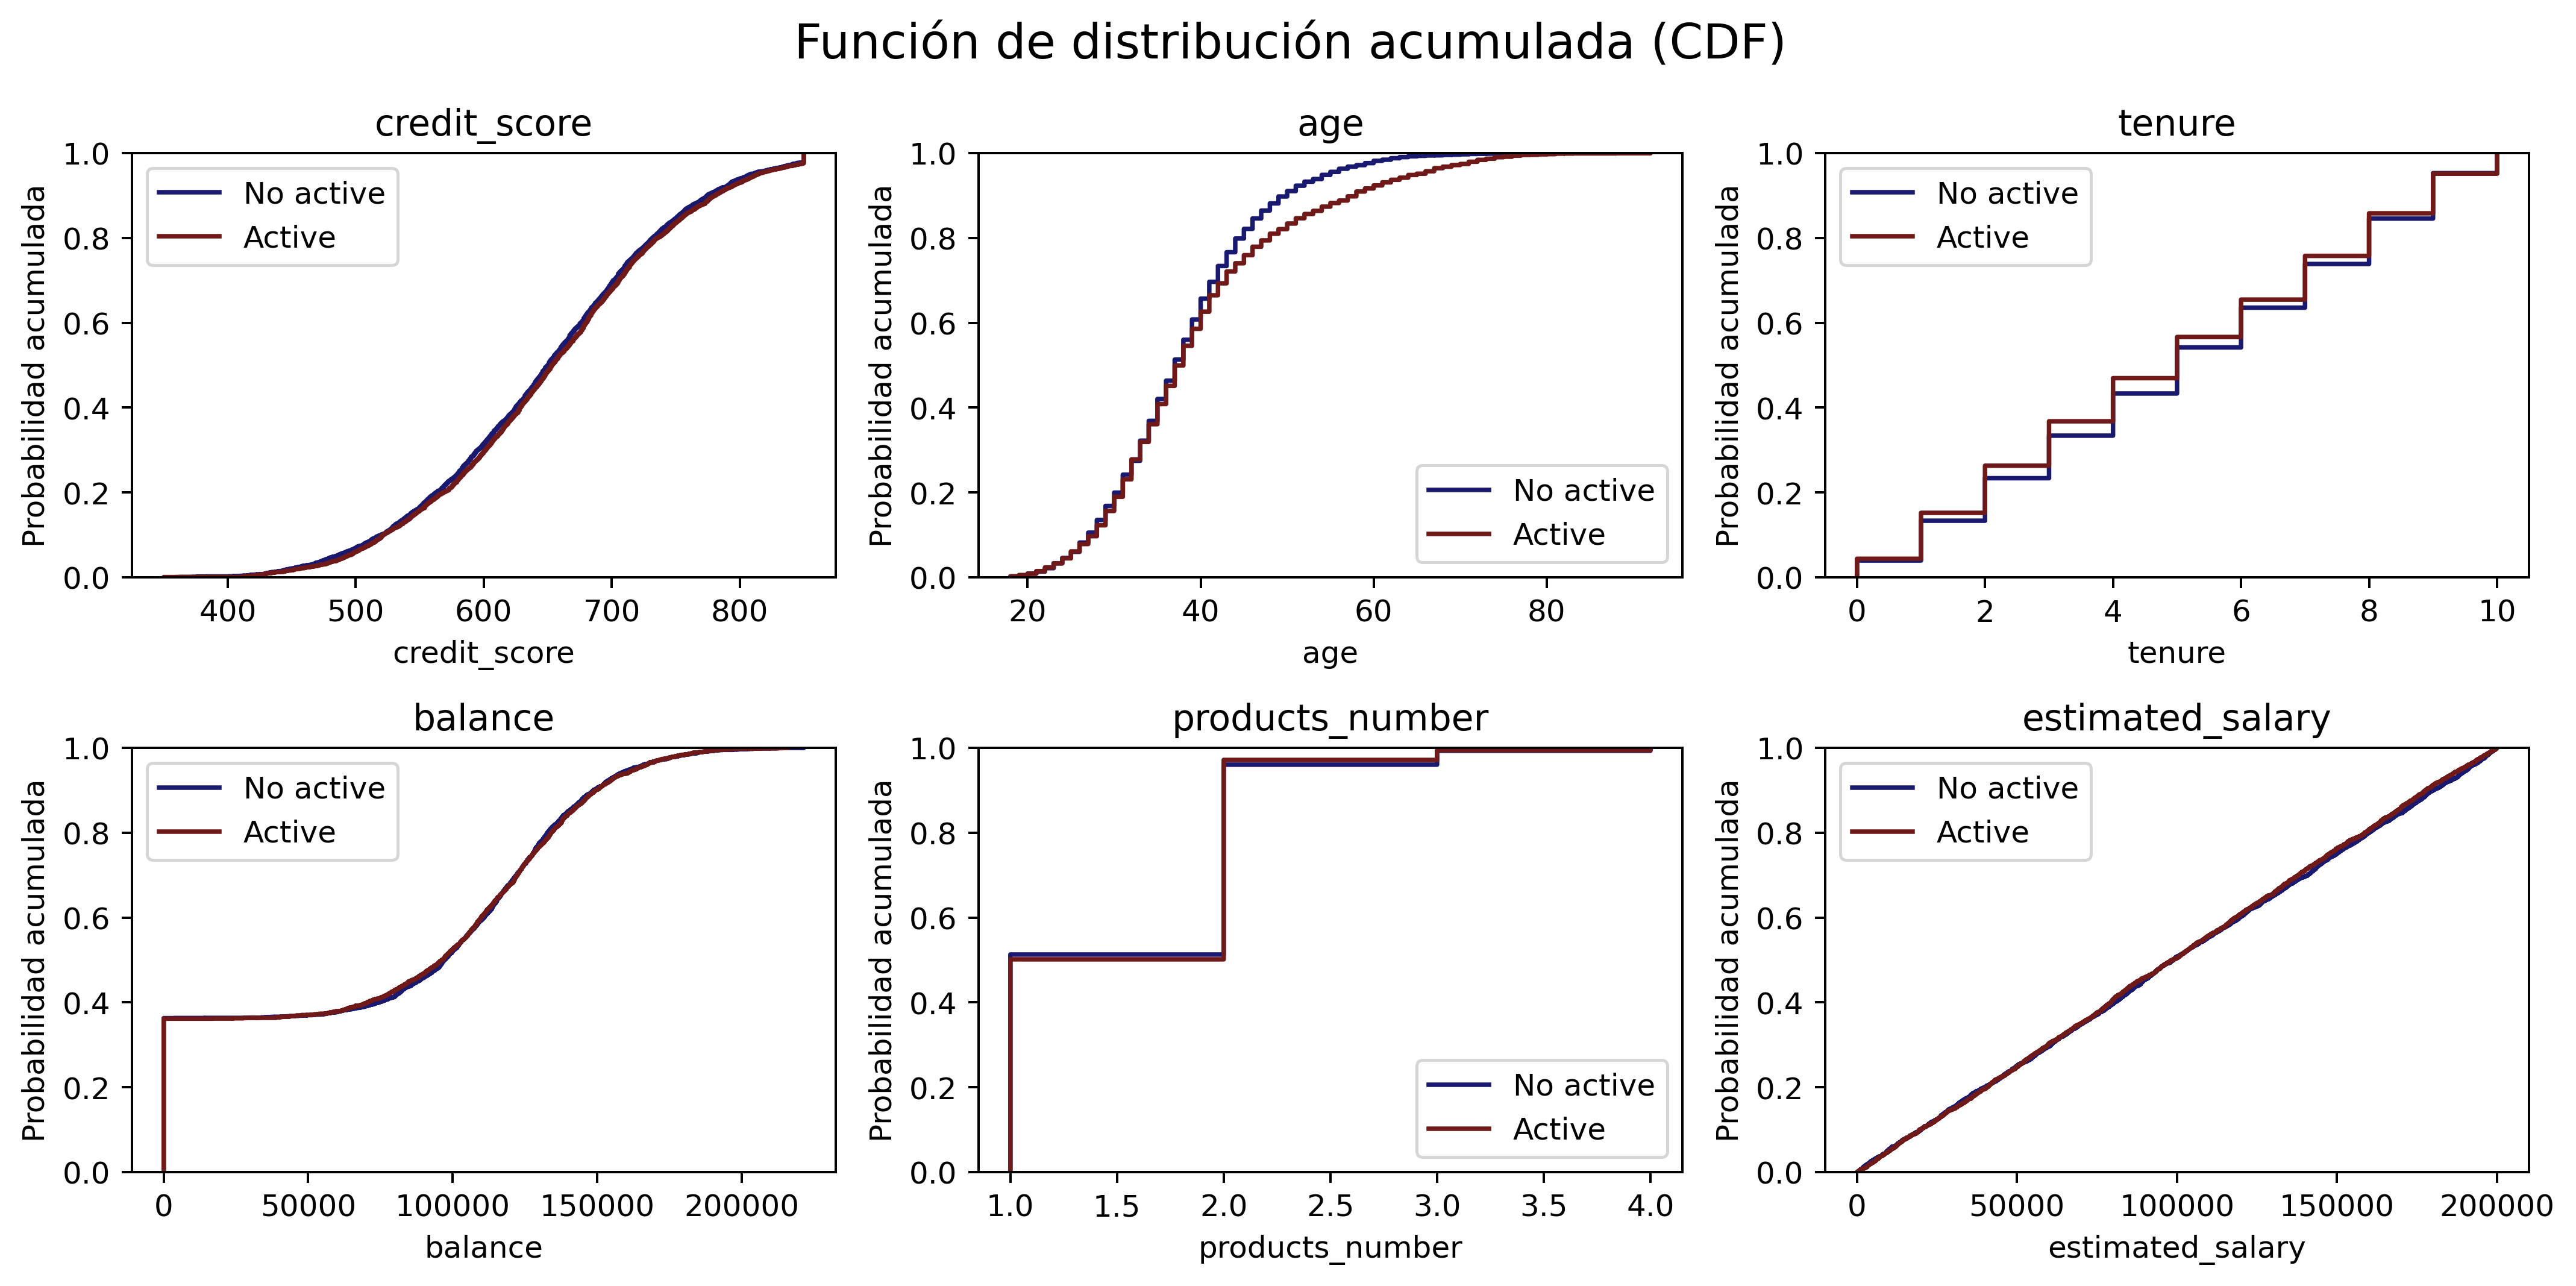

In [143]:
X_NoActive = X_train[X_train['active_member']==0]
X_Active = X_train[X_train['active_member']==1]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(12,6), dpi = 360)
fig.suptitle('Función de distribución acumulada (CDF)', fontsize = 16)
for i,var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    axs[row,col].set_title(var)
    axs[row,col].ecdf(X_NoActive[var], color = churn_colors[0], label = 'No active')
    axs[row,col].ecdf(X_Active[var], color = churn_colors[1], label = 'Active')
    axs[row,col].legend()
    axs[row,col].set_ylabel('Probabilidad acumulada')
    axs[row,col].set_xlabel(var)
plt.tight_layout()
plt.show()

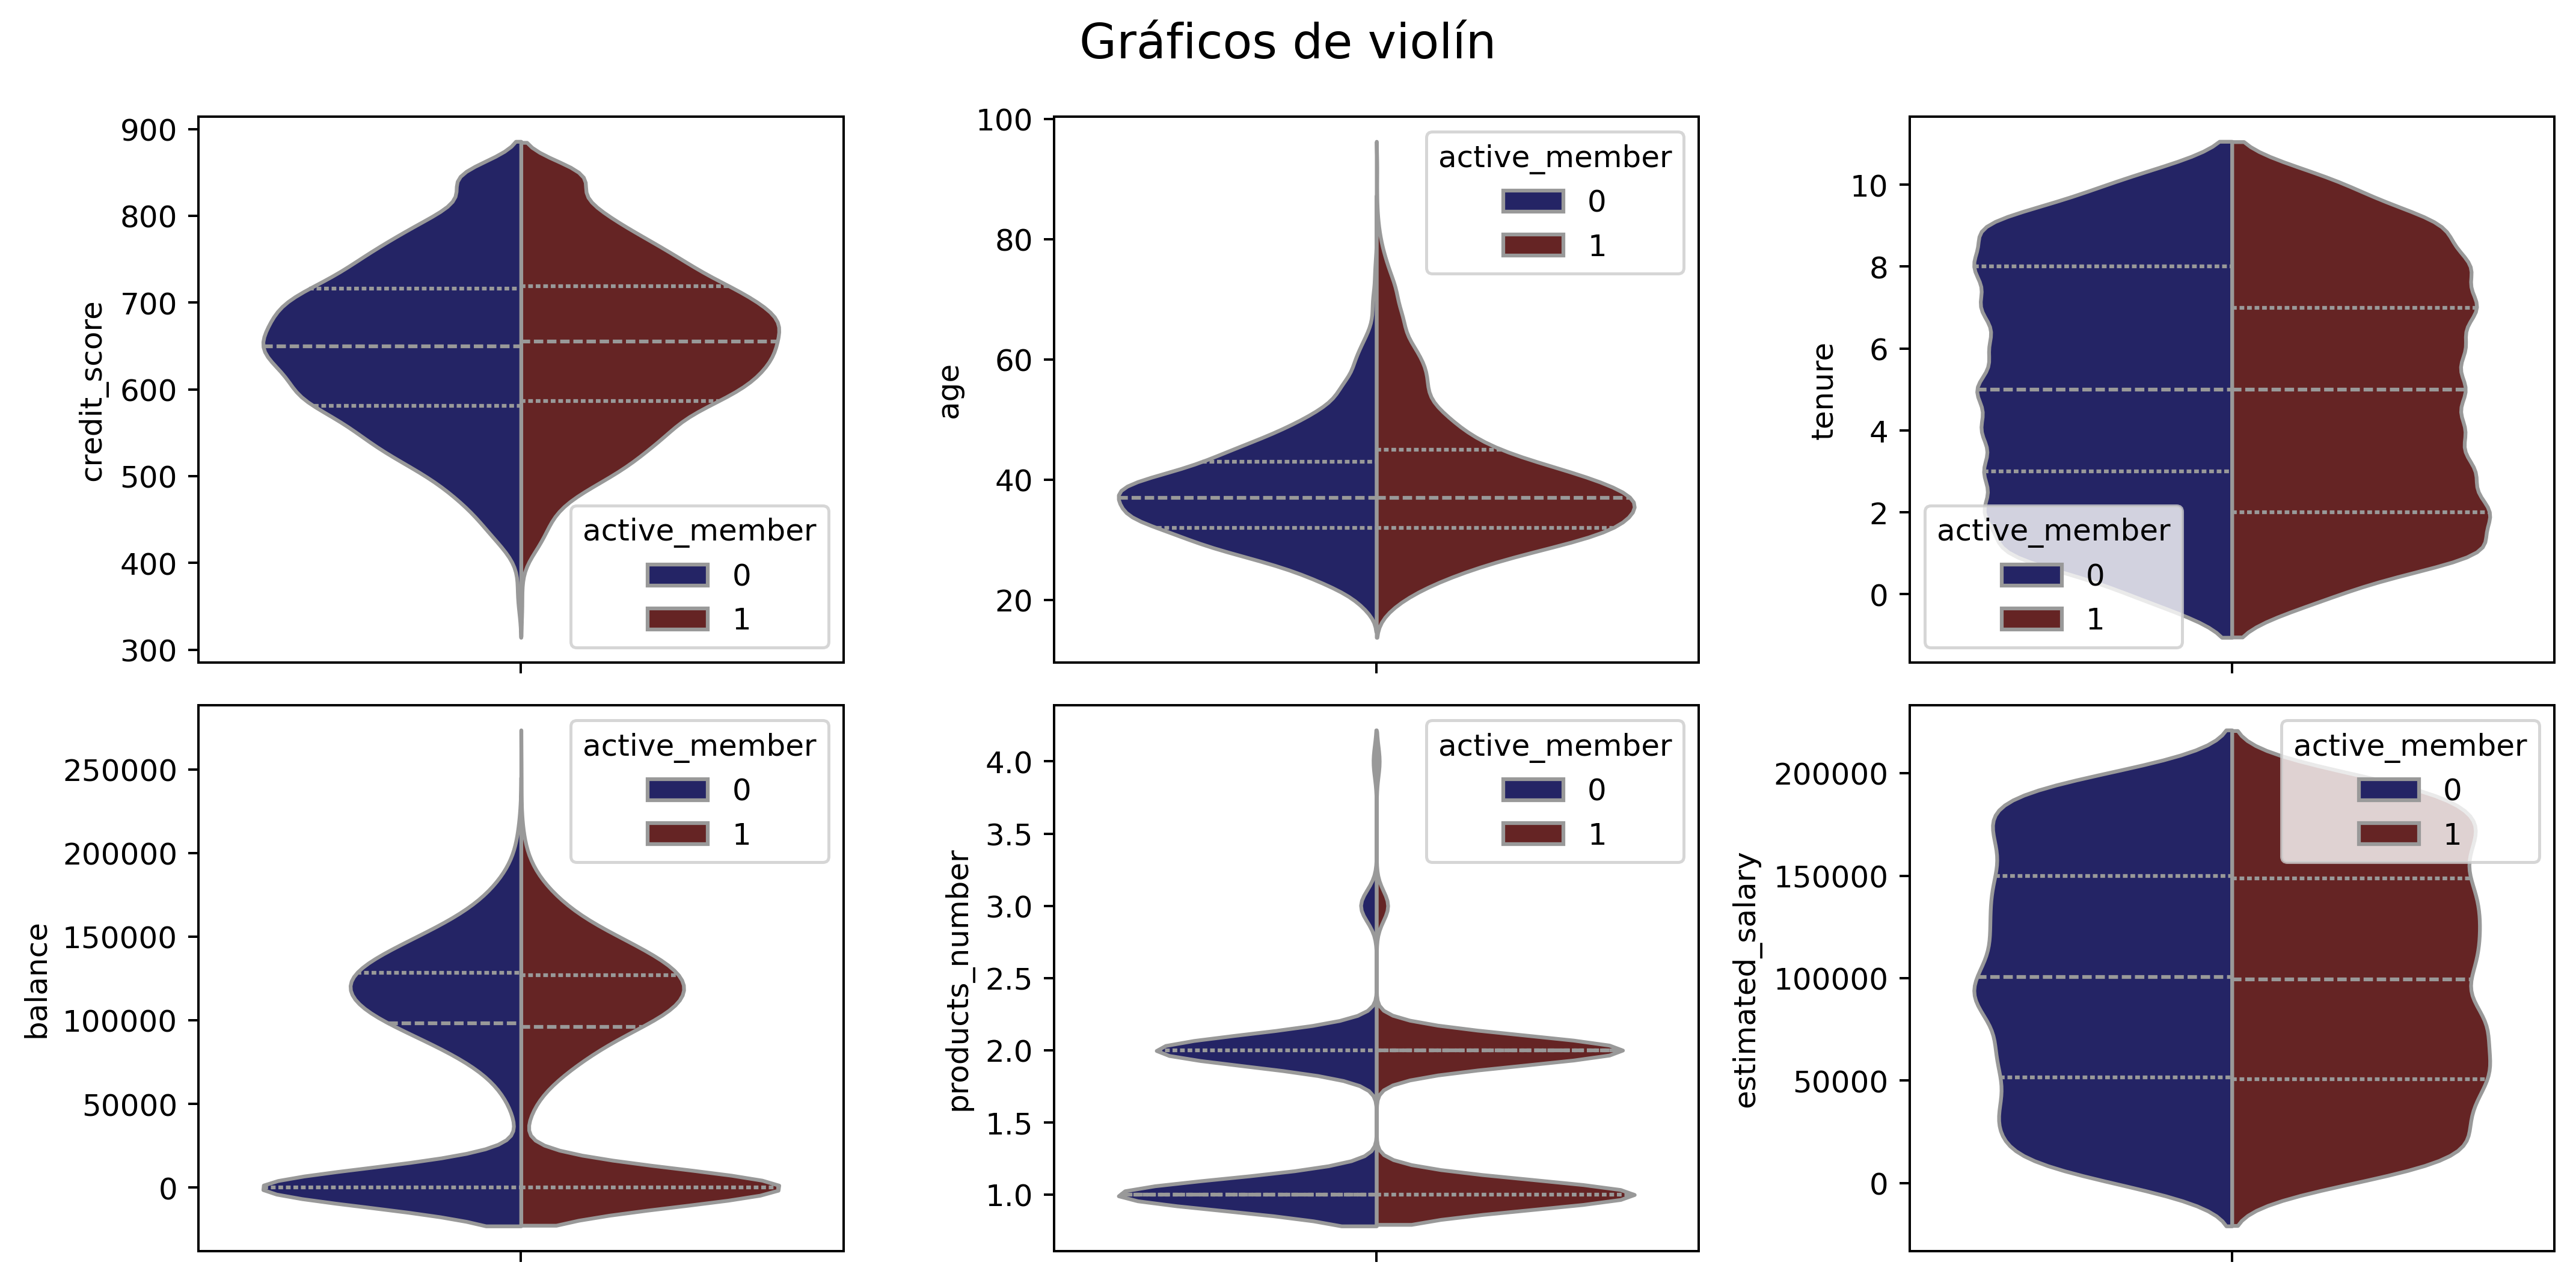

In [144]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, dpi = 360, figsize = (12,6))
fig.suptitle('Gráficos de violín', fontsize = 16)
for i, var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    sns.violinplot(data=df_raw, y=var, hue = 'active_member',
                   palette=churn_colors, split=True, inner='quart', ax = axs[row][col], fill = True, linecolor = '#999999')
    axs[row][col].set_ylabel(var)
plt.tight_layout()
plt.show()

In [ ]:
df_NoChurn = df_raw[df_raw['churn']==0]
df_Churn = df_raw[df_raw['churn']==1]

In [ ]:
def stratified_split(X,Y,rate_partition, seed = None, as_array = None):
    X_columns = X.columns
    X = X.to_numpy()
    Y = Y.to_numpy()
    rate_partition = np.array(rate_partition)
    
    classes, n_classes = np.unique(Y, return_counts=True)
    
    rng = np.random.default_rng(seed)          # ← único RNG
    id_shuffled = rng.permutation(len(Y))      # ← usa el mismo RNG
    X, Y = X[id_shuffled], Y[id_shuffled]
    
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    X_test = []
    Y_test = []

    for i in range(len(classes)):
        X_k = X[Y==classes[i]]
        Y_k = Y[Y==classes[i]]
        n_split = (n_classes[i]*rate_partition).astype(np.int64)
        n_train, n_val, n_test = n_split
        
        X_train.append(X_k[:n_train])
        Y_train.append(Y_k[:n_train])
        X_val.append(X_k[n_train:n_train+n_val])
        Y_val.append(Y_k[n_train:n_train+n_val])
        X_test.append(X_k[n_train+n_val:])
        Y_test.append(Y_k[n_train+n_val:])
            
    X_train = np.vstack(X_train)
    Y_train = np.concatenate(Y_train)
    X_val   = np.vstack(X_val)
    Y_val   = np.concatenate(Y_val)
    X_test  = np.vstack(X_test)
    Y_test  = np.concatenate(Y_test)
    
    if not(as_array):
        X_train = pd.DataFrame(data = X_train, columns = X_columns)
        X_val = pd.DataFrame(data = X_val, columns = X_columns)
        X_test = pd.DataFrame(data = X_test, columns = X_columns)

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
Y = df['churn']
X = df.drop(columns = ['customer_id', 'churn'])
rate_partition = [0.70, 0.15, 0.15]

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = stratified_split(X, Y, rate_partition, seed=2, as_array=False)

In [ ]:
n_train = X_train.shape[0]

In [ ]:
n_bins = int(1+(np.log(n_train)/np.log(2)))
print(f'Número de clases (Sturges) {n_bins}')

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, dpi = 120, figsize = (12,6))
for i in range(len(numerical_vars)):
    row = int(i/2)
    col = i-2*row
    axs[row,col].hist(X_train[numerical_vars[i]], bins = n_bins, color = '#191970')
    axs[row,col].set_title(numerical_vars[i])
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, dpi = 120, figsize = (12,6))
for i in range(len(numerical_vars)):
    row, col = divmod(i,2)
    axs[row,col].scatter(X_train[numerical_vars[i]], Y_train, alpha = 0.01, color = '#191970')
    axs[row,col].set_title(numerical_vars[i])
plt.tight_layout()
plt.show()

No es posible observar una variable que separe claramente la pertenencia a una determinada clase de `churn`. Sin embargo, es posible destacar algunos $insight$:
1. Las personas con un `credit_score` por debajo de 400 suelen dejar el banco.
2. Las personas con una edad mayor a 75 no suelen abandonar.
3. Las personas un número de 4 productos (`products_number`) suelen tener abandono.
   
Es necesario hacer un análisis a estos datos para asegurarse de que no sean casos aislados.

In [ ]:
churn_colors = ['#191970','#701919']

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols=2, dpi=120, figsize = (12,6))
for i, categorical_var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    labels = X_train[categorical_var].unique() # Extratendo etiquetas por categoría
    
    # Contando instancias
    counting_label = np.zeros((len(labels), 2), dtype=int)
    for j, label in enumerate(labels):
        counting_label[j, 0] = ((X_train[categorical_var] == label) & (Y_train == 0)).sum()
        counting_label[j, 1] = ((X_train[categorical_var] == label) & (Y_train == 1)).sum()

    # Graficando barras
    x = np.arange(len(labels))
    width = 0.25
    multiplier = 0
    for churn in range(2): # Graficando barras por pertenencia
        rects = axs[row][col].bar(x + width*churn, counting_label[:,churn], width, color=churn_colors[churn], label =f'Churn: {churn}')
        axs[row][col].bar_label(rects)
    axs[row][col].set_title(f'{categorical_var}')
    axs[row][col].legend()
    axs[row][col].set_xticks(x+0.5*width, labels)
    axs[row][col].set_ylim(0, 1.1*counting_label.max())
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
encoder = OneHotEncoder()
data = encoder.fit_transform(X_train['country'].values.reshape(-1, 1)).toarray()

In [ ]:
X_train = pd.concat([X_train.drop("country", axis = 1), pd.DataFrame(data, columns = encoder.categories_[0])], axis = 1)

In [ ]:
X_train.head()

In [ ]:
X_train['gender'] = X_train['gender'].map({'Male': 0, 'Female': 1})
X_columns = X_train.columns

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X_columns)

In [ ]:
X_train.describe()

In [ ]:
X_train.head()

In [ ]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, Y_train)

In [ ]:
Y_hat = clf_LR.predict(X_train)

In [ ]:
print(Y_hat)

In [ ]:
Y_train

In [ ]:
np.abs(Y_hat-Y_train).sum()

In [ ]:
## Probando nuevo pull

Es fundamental revisar la distribución de la variable objetivo (`churn`), ya que esta información permitirá tomar decisiones informadas sobre la estrategia de partición del conjunto de datos. En particular, si existe un desequilibrio de clases significativo, será necesario aplicar técnicas como muestreo estratificado o métodos de balanceo para garantizar que el modelo aprenda adecuadamente ambas clases.